In [3]:

import pandas as pd

df = pd.read_csv('laptops.csv')



In [4]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import mutual_info_regression, SelectKBest, f_regression

sns.set(style='whitegrid', palette='pastel', font_scale=1.2)
%matplotlib inline

In [5]:
df.head(5)

Laptop Status   Brand  \
0  ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...    New    Asus   
1  Alurin Go Start Intel Celeron N4020/8GB/256GB ...    New  Alurin   
2  ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...    New    Asus   
3  MSI Katana GF66 12UC-082XES Intel Core i7-1270...    New     MSI   
4  HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...    New      HP   

        Model            CPU  RAM  Storage Storage type       GPU  Screen  \
0  ExpertBook  Intel Core i5    8      512          SSD       NaN    15.6   
1          Go  Intel Celeron    8      256          SSD       NaN    15.6   
2  ExpertBook  Intel Core i3    8      256          SSD       NaN    15.6   
3      Katana  Intel Core i7   16     1000          SSD  RTX 3050    15.6   
4         15S  Intel Core i5   16      512          SSD       NaN    15.6   

  Touch  Final Price  
0    No      1009.00  
1    No       299.00  
2    No       789.00  
3    No      1199.00  
4    No       669.01

In [6]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            # Log-transform the target
# Log-transforming the target variable can help stabilize variance and make the model more robust.
df['Log Final Price'] = np.log1p(df['Final Price'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Laptop           2160 non-null   object 
 1   Status           2160 non-null   object 
 2   Brand            2160 non-null   object 
 3   Model            2160 non-null   object 
 4   CPU              2160 non-null   object 
 5   RAM              2160 non-null   int64  
 6   Storage          2160 non-null   int64  
 7   Storage type     2118 non-null   object 
 8   GPU              789 non-null    object 
 9   Screen           2156 non-null   float64
 10  Touch            2160 non-null   object 
 11  Final Price      2160 non-null   float64
 12  Log Final Price  2160 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 219.5+ KB


In [8]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          #GPU needs to be dropped due to too much missing values

In [9]:
""" Use Log Final Price when detecting relationships for modeling.

Use Final Price when interpreting results for human understanding"""

' Use Log Final Price when detecting relationships for modeling.\n\nUse Final Price when interpreting results for human understanding'

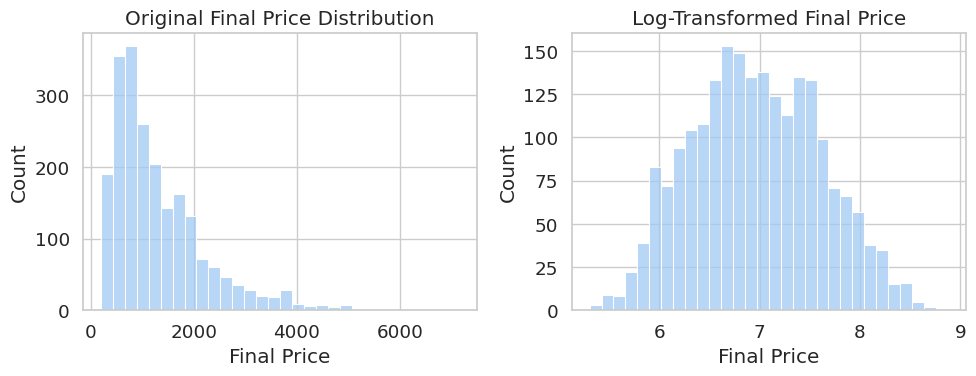

In [10]:
# Plot the distribution of Final Price
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Final Price'], kde=False, bins=30)
plt.title('Original Final Price Distribution')

# Plot the log-transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['Final Price']), kde=False, bins=30) # kde adds a smooth kernel density estimate and bins divides into 30 bars.
plt.title('Log-Transformed Final Price')
plt.tight_layout()
plt.show()

In [11]:
original_skew = df['Final Price'].skew()
log_skew = np.log1p(df['Final Price']).skew()
print(f"Original Skew: {original_skew:.2f}")
print(f"Log-Transformed Skew: {log_skew:.2f}")

# Skewness is a statistical measure that describes the asymmetry of a data distribution around its mean.



Original Skew: 1.65
Log-Transformed Skew: 0.11


In [12]:
# Remove all currency symbols and commas from Final Price
if 'Final Price' in df.columns:
    # Use regex to remove any character that is not a digit, decimal point, or comma
    # Then remove commas specifically before converting to float to handle potential thousands separators
    df['Final Price'] = df['Final Price'].astype(str).str.replace(r'[^\d.,]', '', regex=True).str.replace(',', '', regex=False).astype(float)

# Replace common placeholders with NaN
df.replace(['--', 'N/A', 'na', 'NaN', 'nan'], np.nan, inplace=True)

# Convert yes/no to binary if relevant
binary_map = {'Yes': 1, 'No': 0}
# Apply binary mapping to all columns that contain 'Yes'/'No'
df = df.replace(binary_map)
df = df.infer_objects(copy=False)




# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Drop 'GPU' due to high missingness
if 'GPU' in df.columns:
    missing_ratio = df['GPU'].isnull().mean()  # calculates % of missing values (as a fraction)
    if missing_ratio > 0.5:
        df.drop(columns=['GPU'], inplace=True)


/tmp/ipython-input-12-3432827011.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(binary_map)


In [13]:
# Using NumPy's where for binary mapping

# Convert 'Status' to binary: 'New' -> 1, others -> 0
df['Status'] = np.where(df['Status'] == 'New', 1, 0)

# Verify the change
print(df['Status'].value_counts())
print(df['Status'].dtype)

Status
1    1498
0     662
Name: count, dtype: int64
int64


In [14]:
df = df.dropna()


In [15]:
df.shape

(2114, 12)

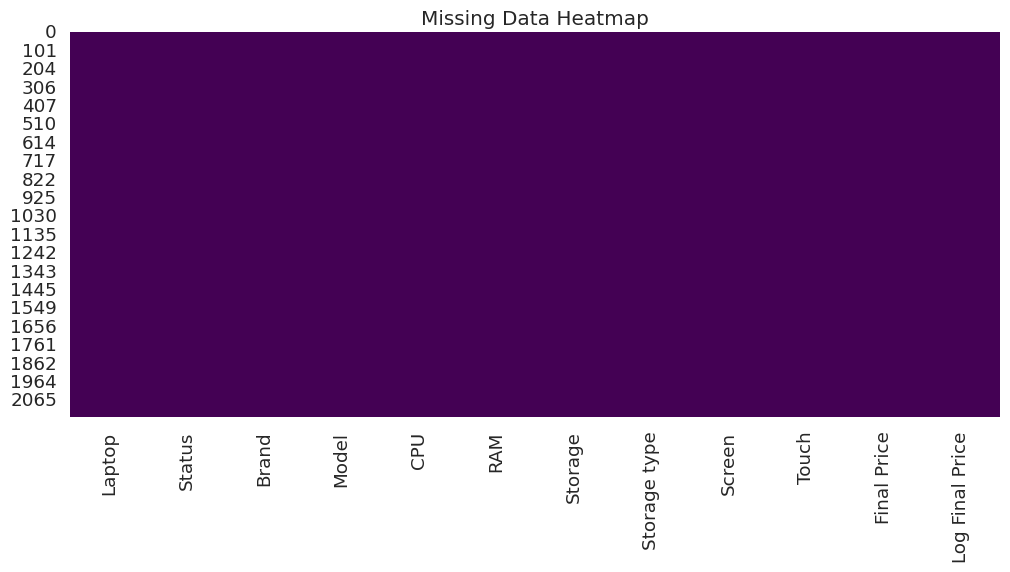

In [16]:
#Generated the Heatmap to visualize missing data
# Visualize missing data
plt.figure(figsize=(12, 5))
# Create a heatmap to visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') # Set the color map to 'viridis' for better visibility
plt.title('Missing Data Heatmap')
plt.show()

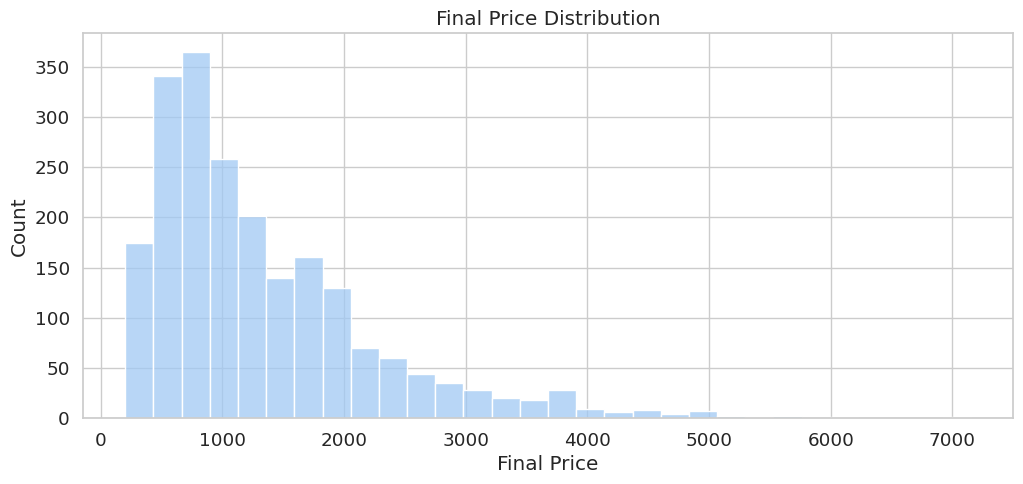

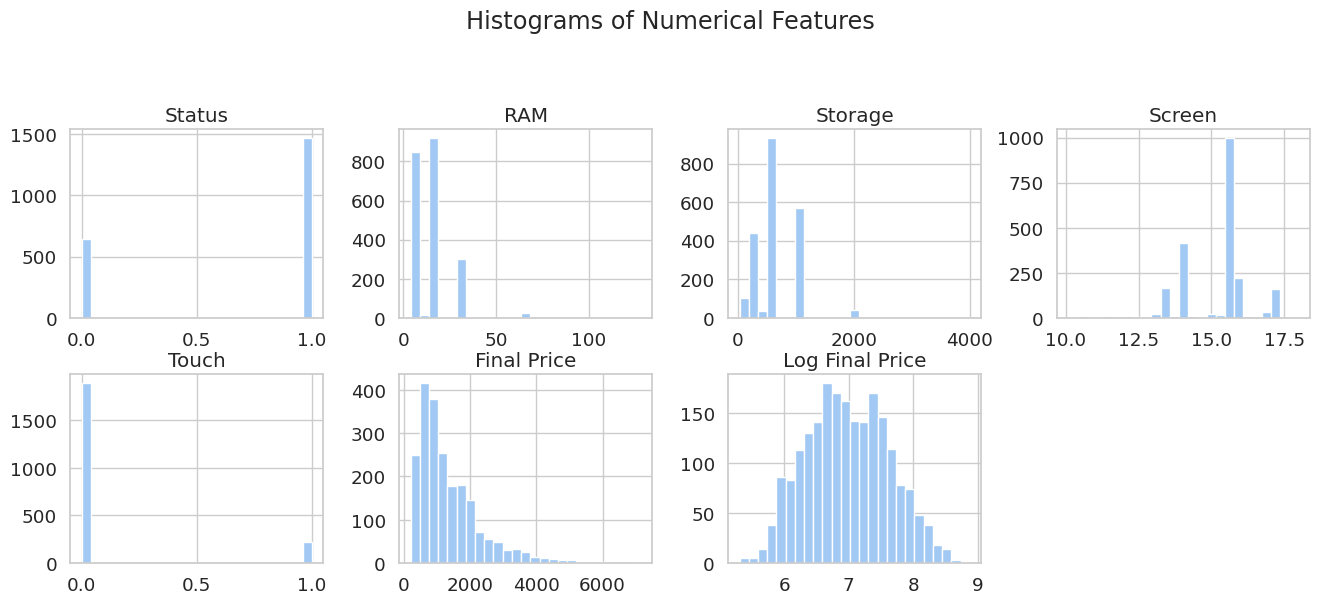

In [17]:
#### Exploratory Data Analysis: Numeric Distributions
plt.figure(figsize=(12, 5))
sns.histplot(df['Final Price'], kde=False, bins=30)
plt.title('Final Price Distribution')
plt.show()

numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].hist(figsize=(16, 12), bins=25, layout=(4, 4))
plt.suptitle("Histograms of Numerical Features")
plt.show()

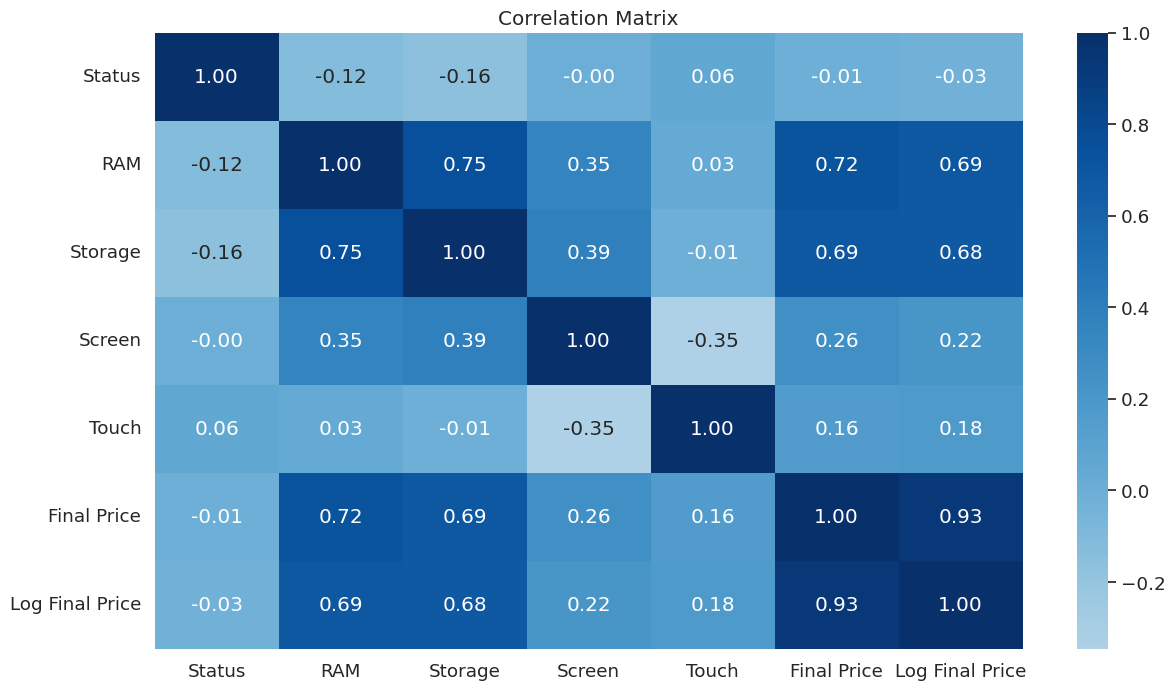

In [18]:
#### Exploratory Data Analysis: Correlations

plt.figure(figsize=(14, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f', center=0) # annot adds numeric values & coolwarm shows the strengths.
plt.title("Correlation Matrix")
plt.show()

# Correalation matrix can be misleading because it only shows linear relationships.

<Figure size 1200x500 with 0 Axes>

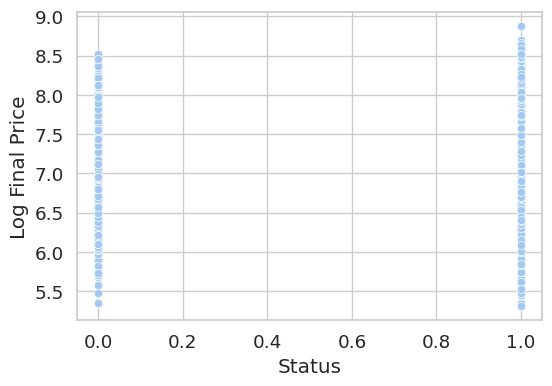

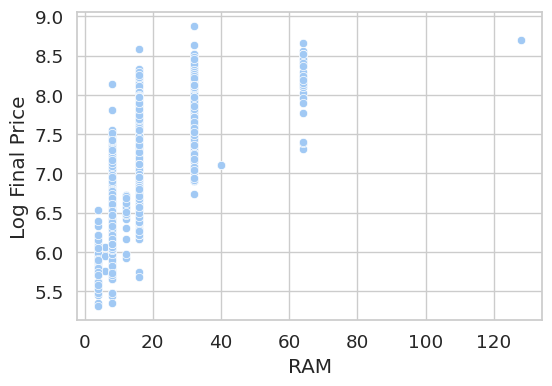

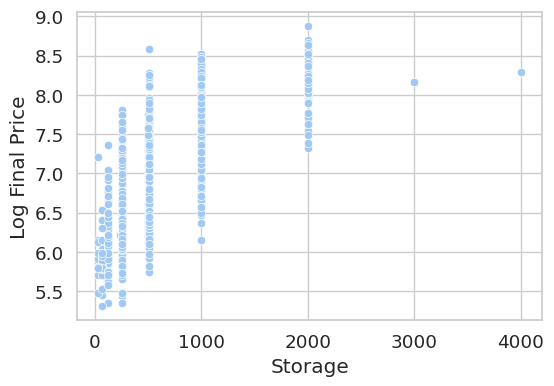

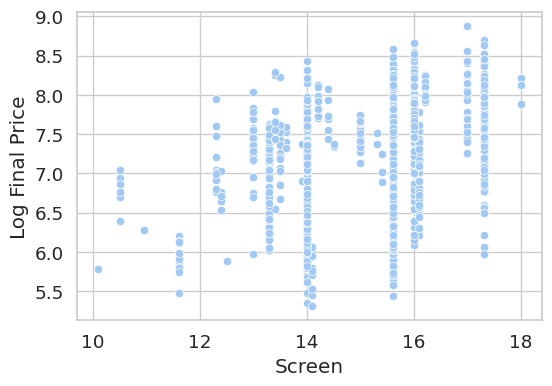

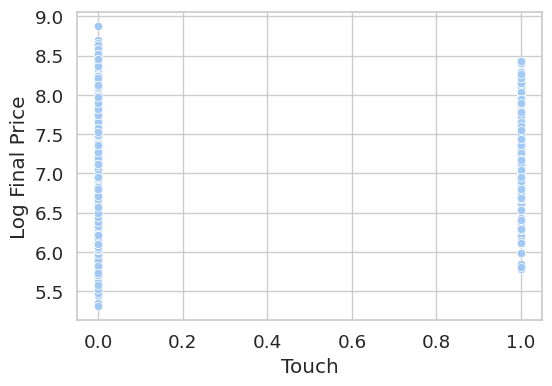

In [19]:
# A scatter plot is a type of data visualization that displays the relationship between two numerical variables by using dots.
# Scatter Plots vs Log Final Price
plt.figure(figsize=(12, 5))
# Plot relationships between each individual numeric feature and Log Final Price
from scipy.stats import pearsonr

if 'Log Final Price' in df.columns:  # Check for 'Log Final Price' column
    for feature in df.select_dtypes(include=np.number).columns:
        # Check if the feature is not 'Final Price' or 'Log Final Price'
        if feature not in ['Final Price', 'Log Final Price']:
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=df[feature], y=df['Log Final Price'])  # Use 'Log Final Price' on y-axis
            # Calculate Pearson correlation with 'Log Final Price'
            corr, _ = pearsonr(df[feature], df['Log Final Price'])
            plt

/tmp/ipython-input-20-3647303146.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=feature, y='Final Price', data=df, estimator=np.mean, ci='sd')


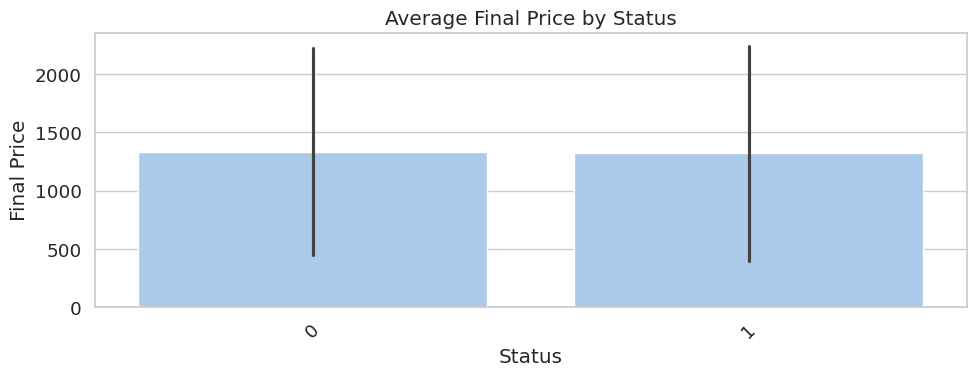

/tmp/ipython-input-20-3647303146.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=feature, y='Final Price', data=df, estimator=np.mean, ci='sd')


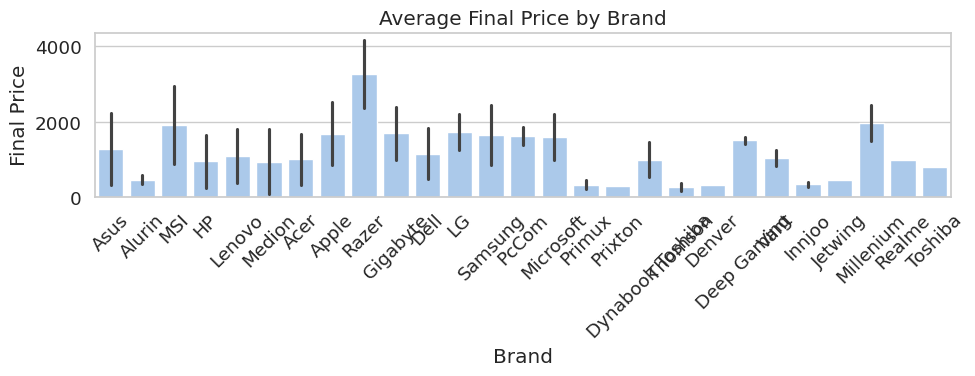

/tmp/ipython-input-20-3647303146.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=feature, y='Final Price', data=df, estimator=np.mean, ci='sd')


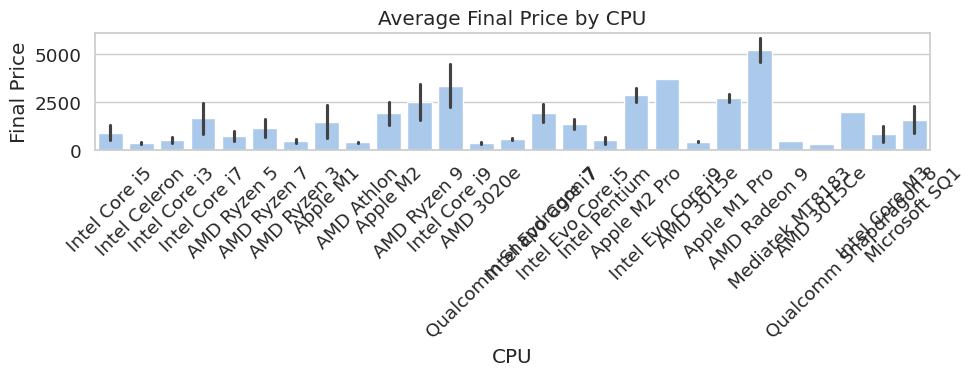

/tmp/ipython-input-20-3647303146.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=feature, y='Final Price', data=df, estimator=np.mean, ci='sd')


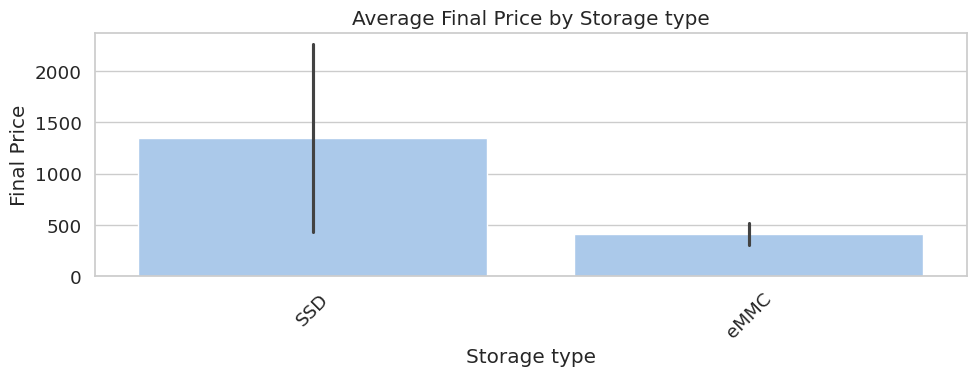

In [20]:
# Categorical features to analyze
categorical_features = ['Status', 'Brand', 'CPU', 'Storage type']

#Bar Plot

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.barplot(x=feature, y='Final Price', data=df, estimator=np.mean, ci='sd')
    plt.title(f'Average Final Price by {feature}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Bar plots can help visualize the average Final Price for each category in categorical features and vertical blank line is error bar which shows standard deviation across the categories.

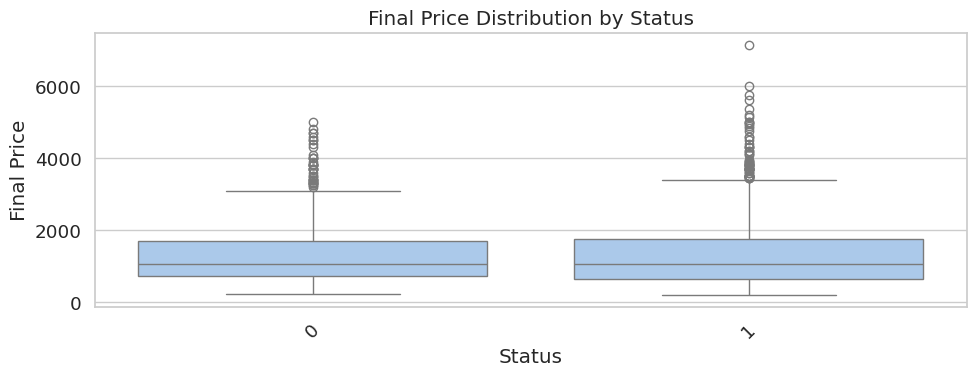

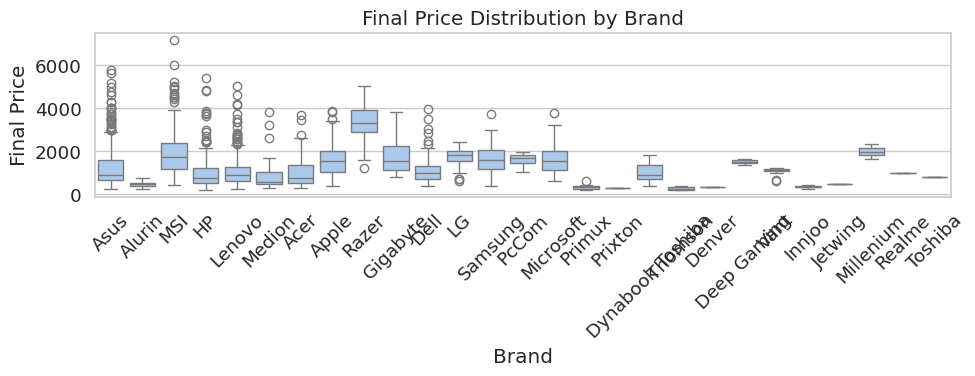

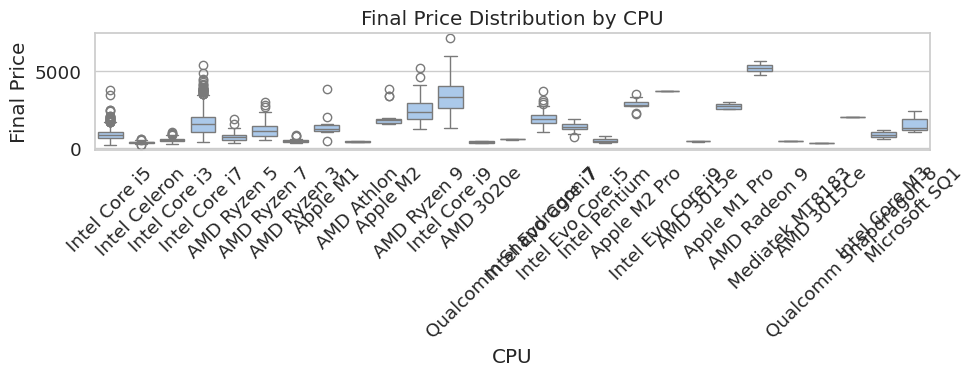

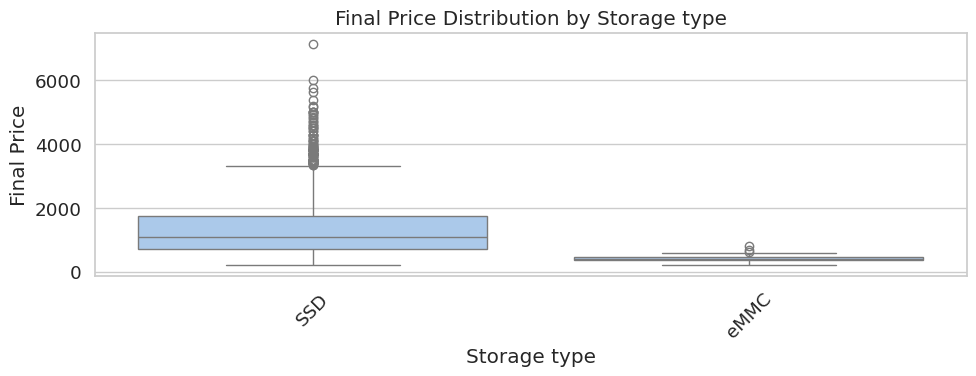

In [21]:
#BOXPLOT
# A box plot is a graphical representation of a dataset that shows its distribution and outliers.  Minimum, First Quartile (Q1), Median (Q2), Third Quartile (Q3) and Maximum.

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=feature, y='Final Price', data=df)
    plt.title(f'Final Price Distribution by {feature}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [22]:
#Boxplot is showing lots of outliers, chose model accordingly

<Axes: ylabel='Brand'>

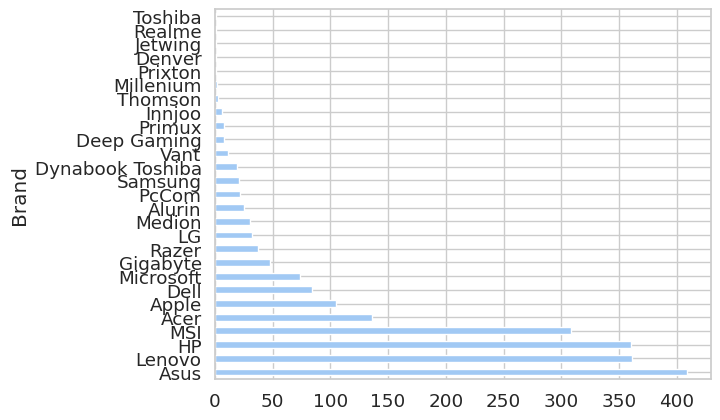

In [23]:
df['Brand'].value_counts().plot(kind='barh')



<Axes: ylabel='CPU'>

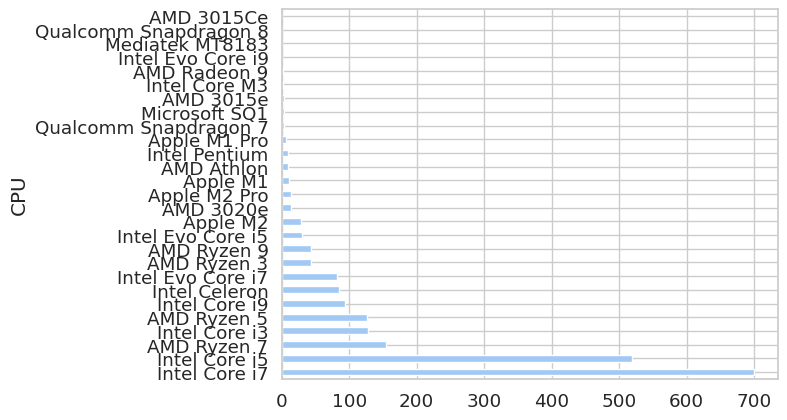

In [24]:
df['CPU'].value_counts().plot(kind='barh')

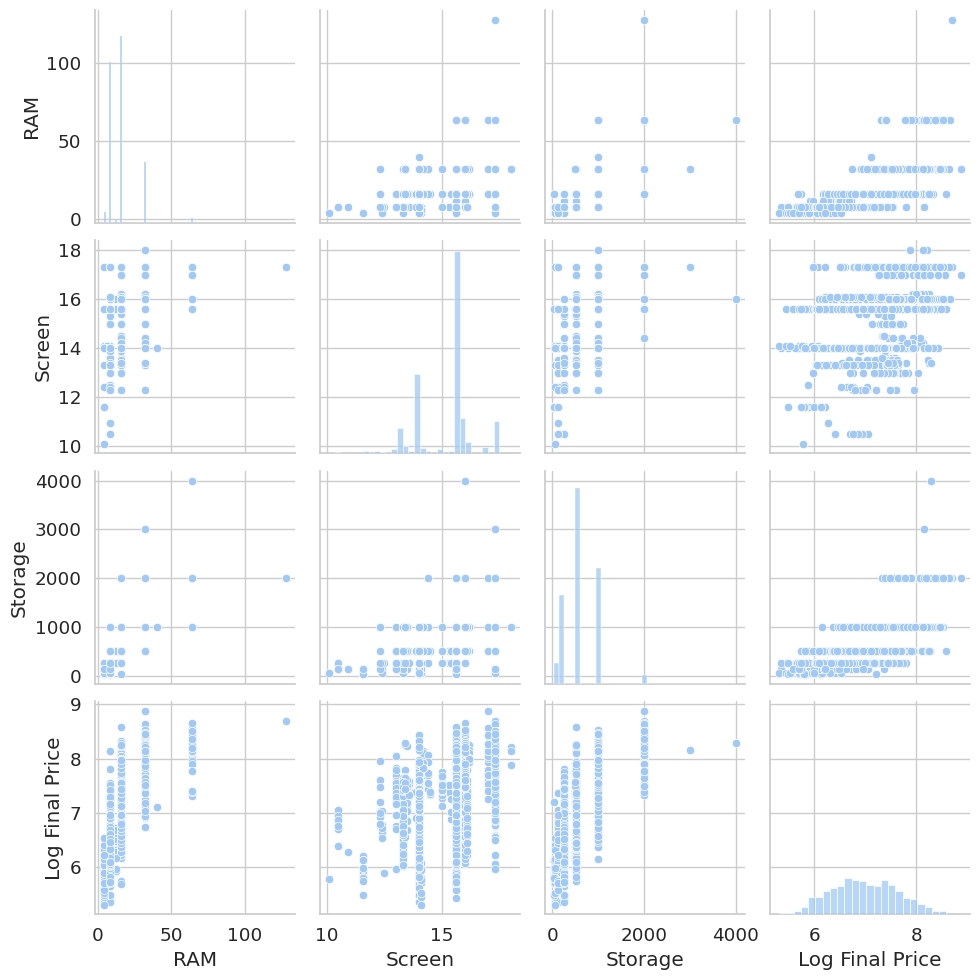

In [25]:
sns.pairplot(df[['RAM', 'Screen', 'Storage', 'Log Final Price']])


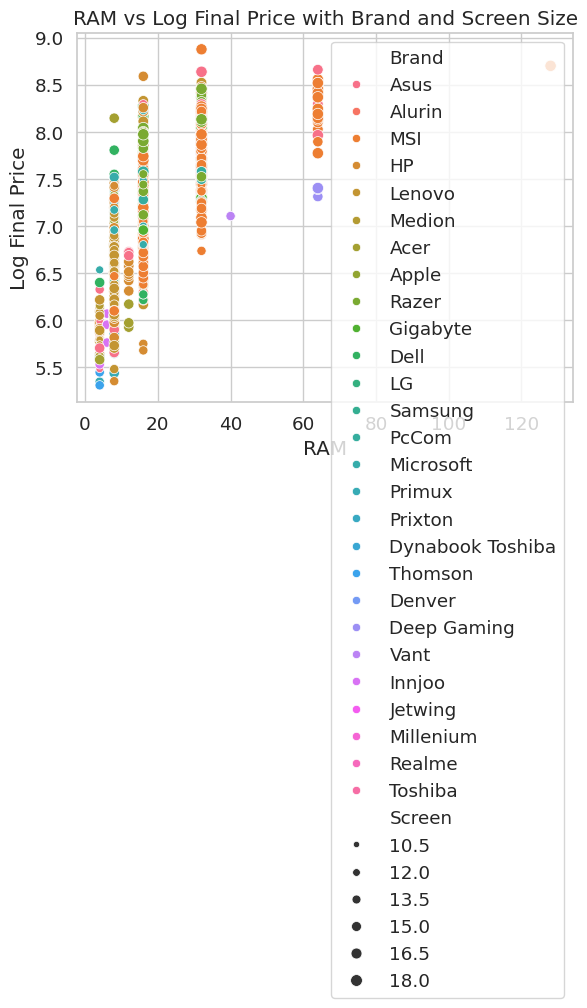

In [26]:
sns.scatterplot(x='RAM', y='Log Final Price', hue='Brand', size='Screen', data=df)
plt.title('RAM vs Log Final Price with Brand and Screen Size')
plt.show()


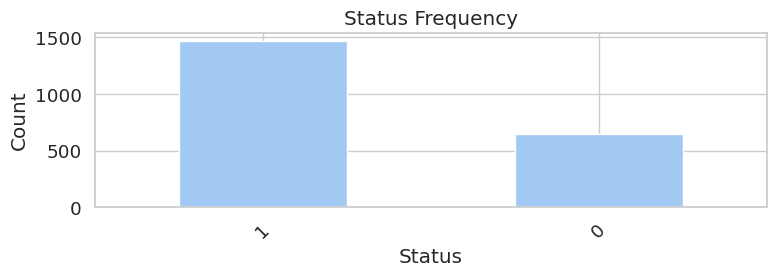

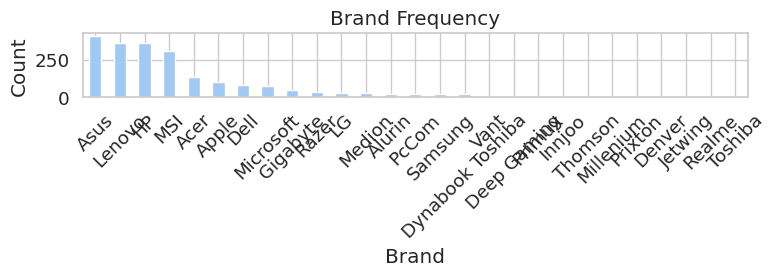

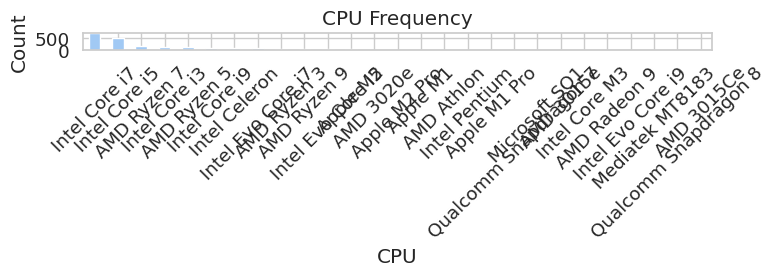

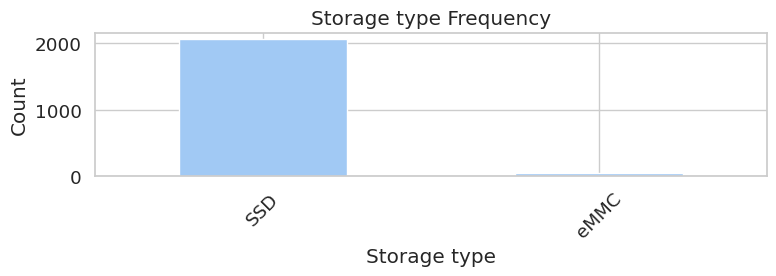

In [27]:
#Frequency Distribution
#To see how often each category appears (useful for imbalance).



for feature in categorical_features:
    plt.figure(figsize=(8, 3))
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'{feature} Frequency')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


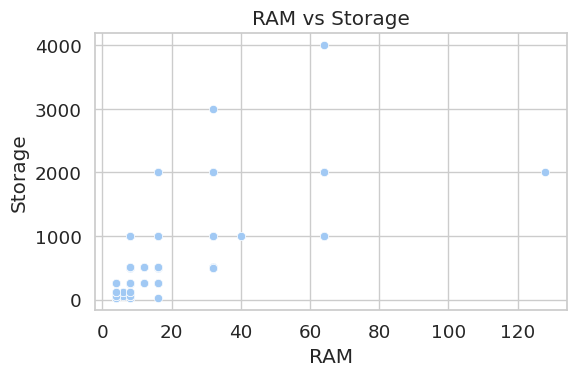

In [28]:
if 'RAM' in df.columns and 'Storage' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df['RAM'], y=df['Storage'])
    plt.title('RAM vs Storage')
    plt.xlabel('RAM')
    plt.ylabel('Storage')
    plt.tight_layout()
    plt.show()

In [29]:
"""While multicollinearity doesn't break all machine learning models (tree-based models are less sensitive), it can cause issues in interpreting the coefficients of linear models (like Linear Regression). If you were building a simple linear regression, it might be harder to say precisely how much only RAM contributes to the price versus how much only Storage contributes, because they move together."""

"While multicollinearity doesn't break all machine learning models (tree-based models are less sensitive), it can cause issues in interpreting the coefficients of linear models (like Linear Regression). If you were building a simple linear regression, it might be harder to say precisely how much only RAM contributes to the price versus how much only Storage contributes, because they move together."

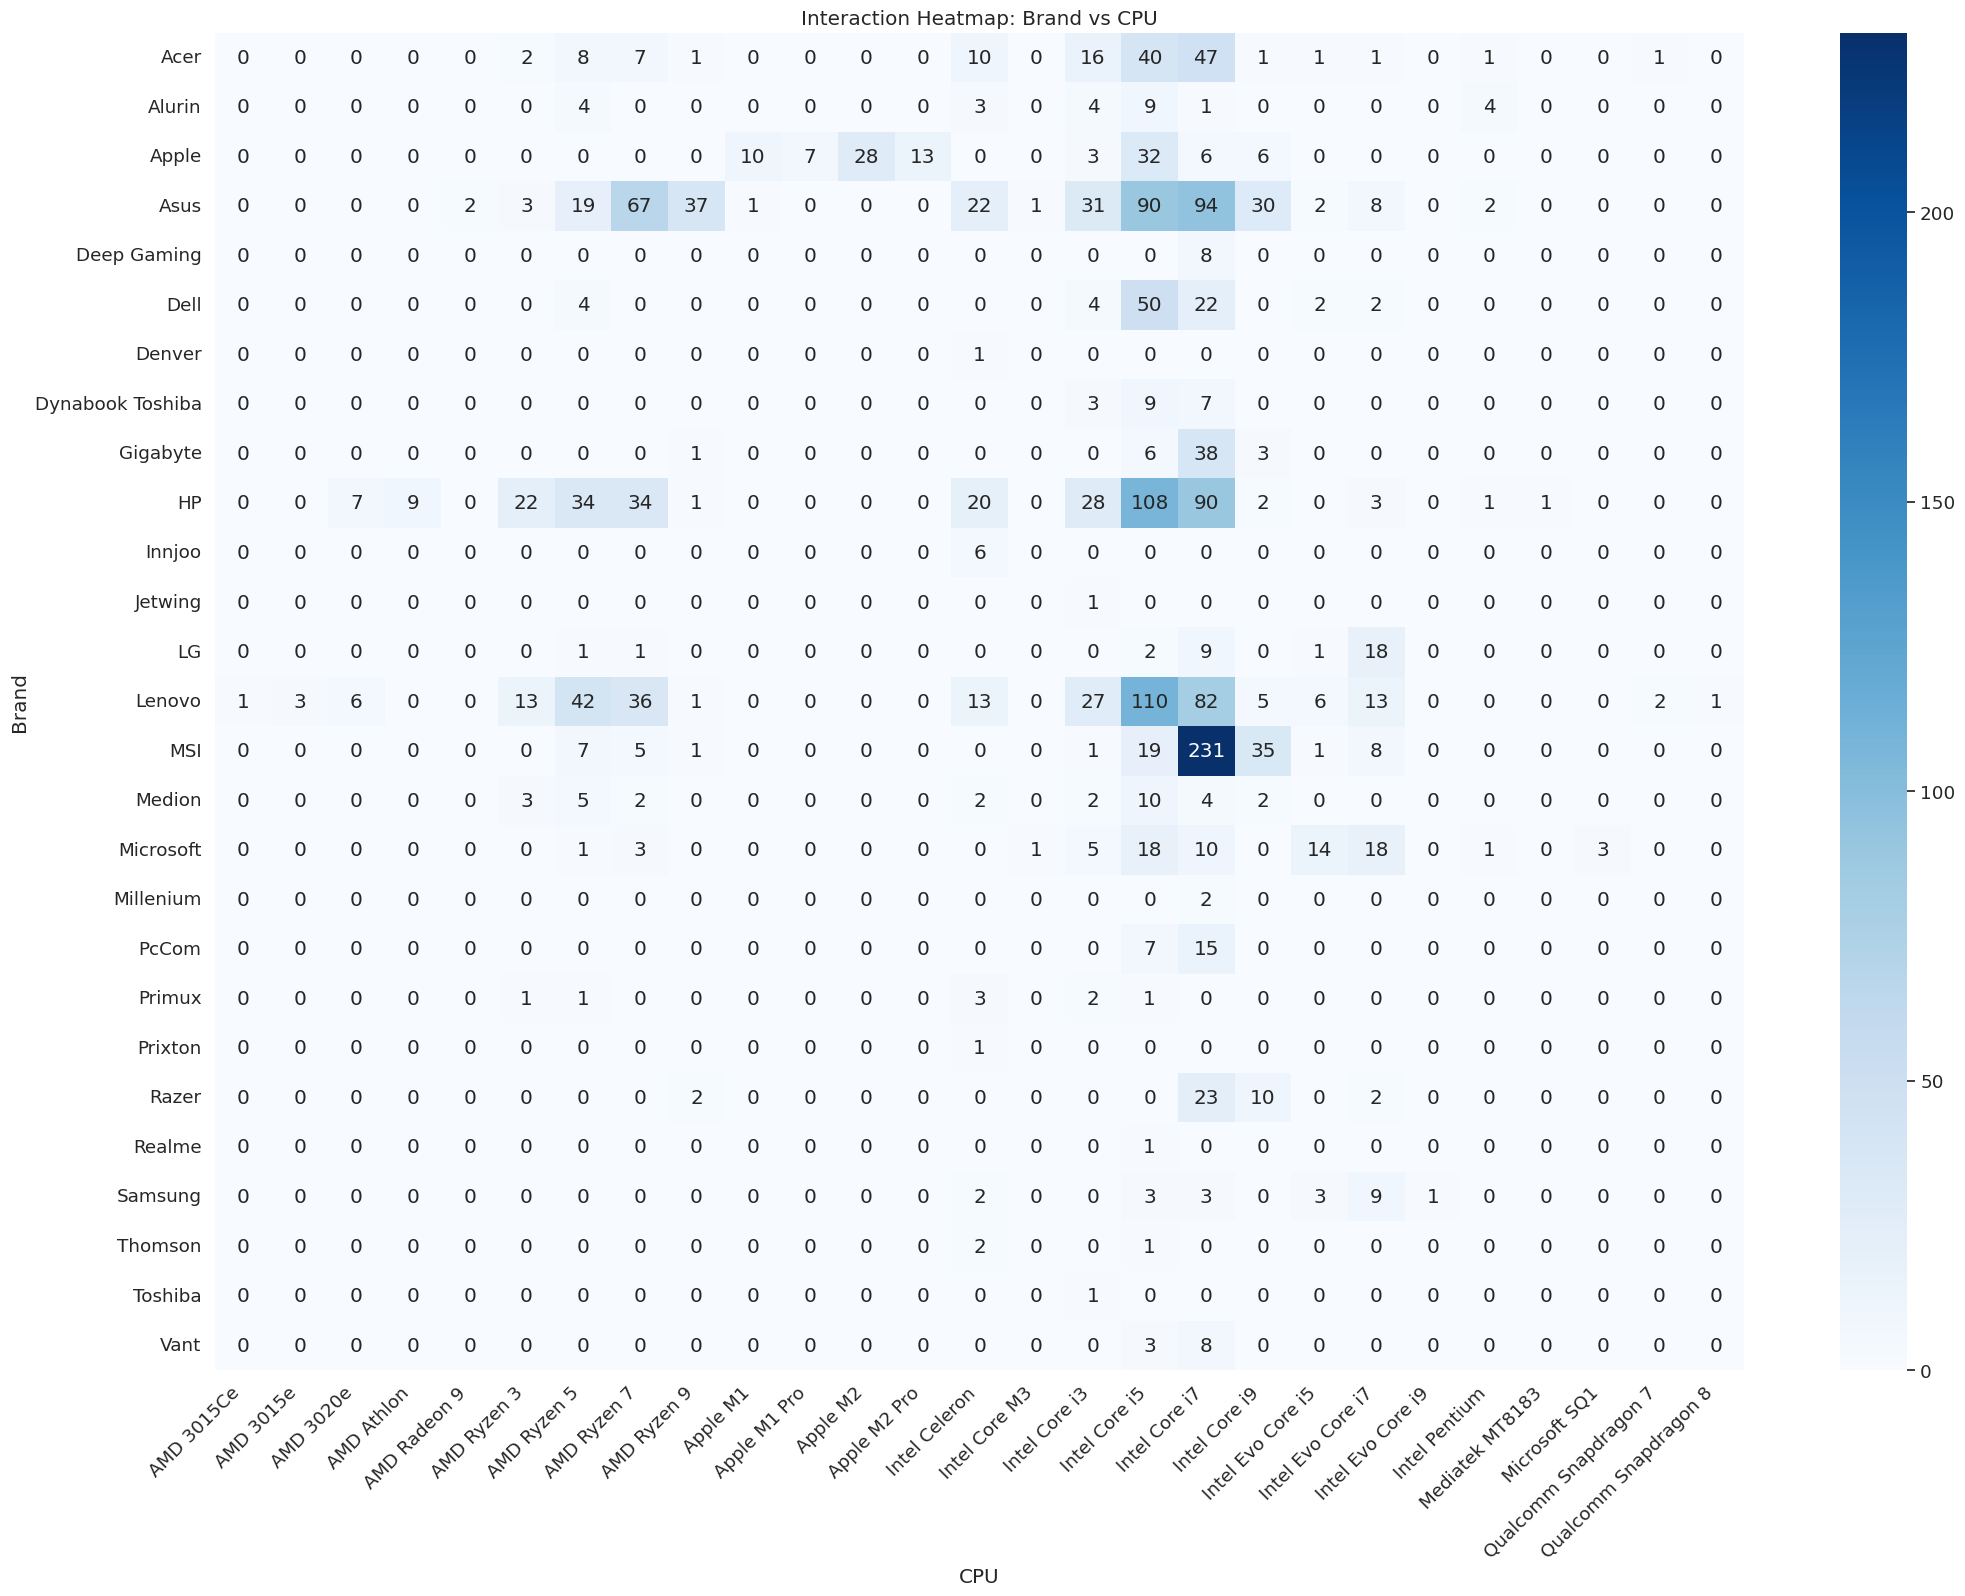

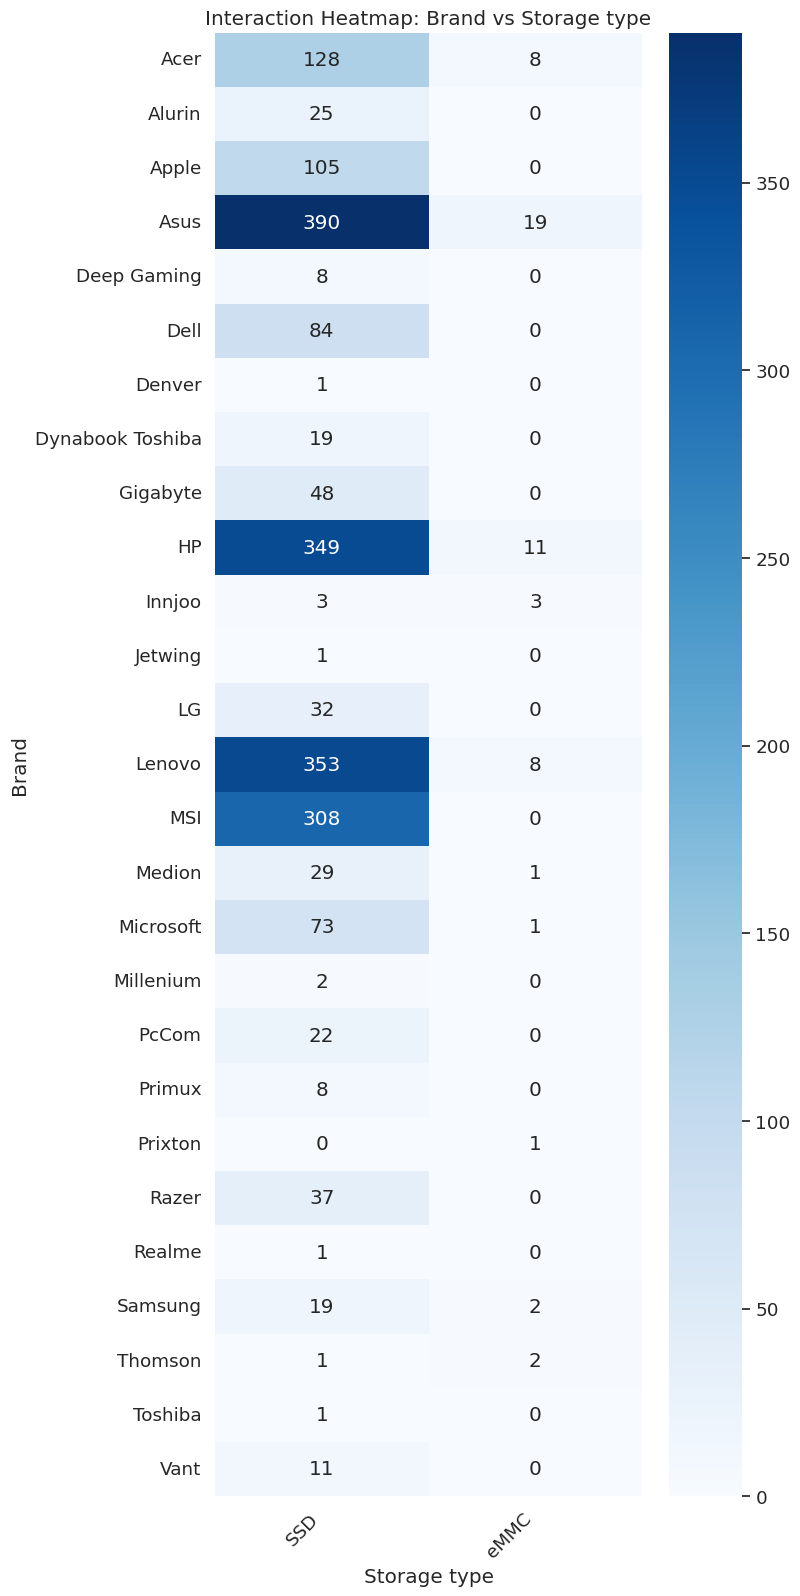

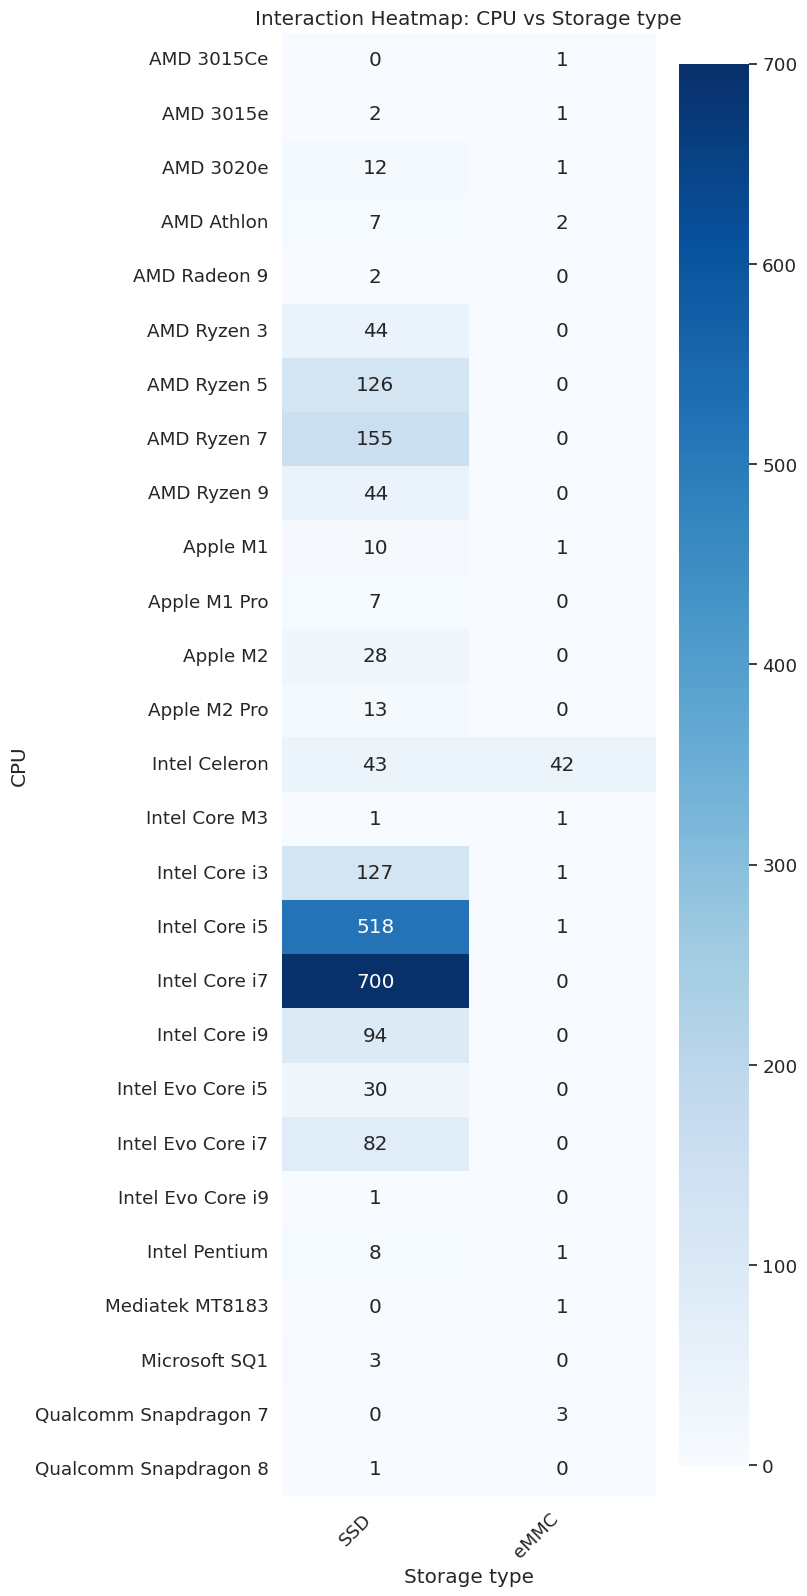

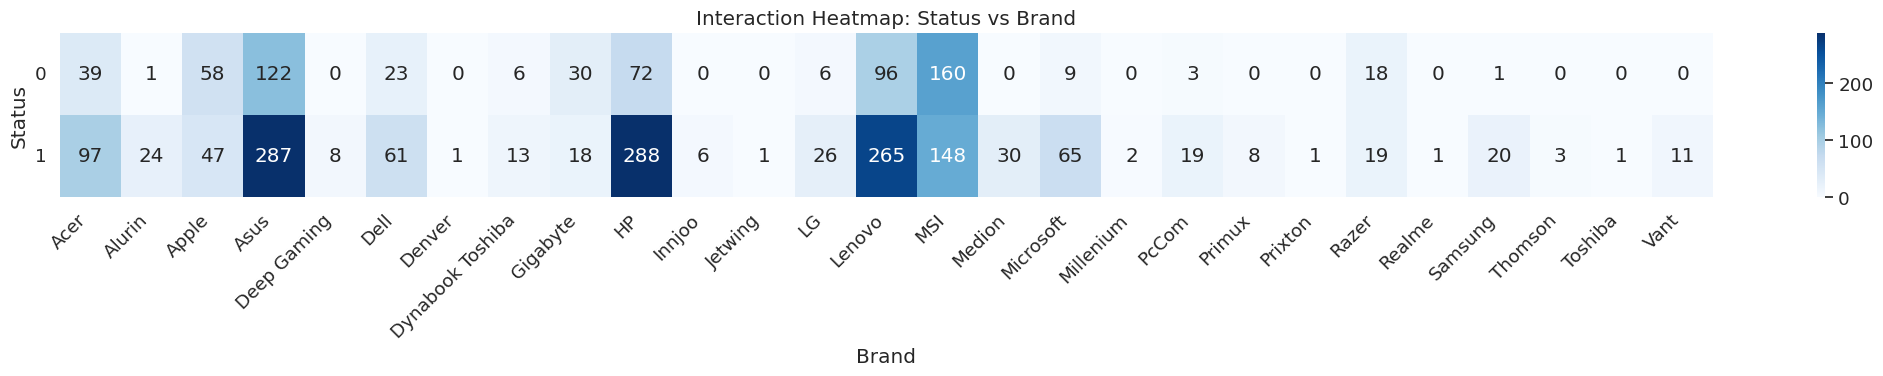

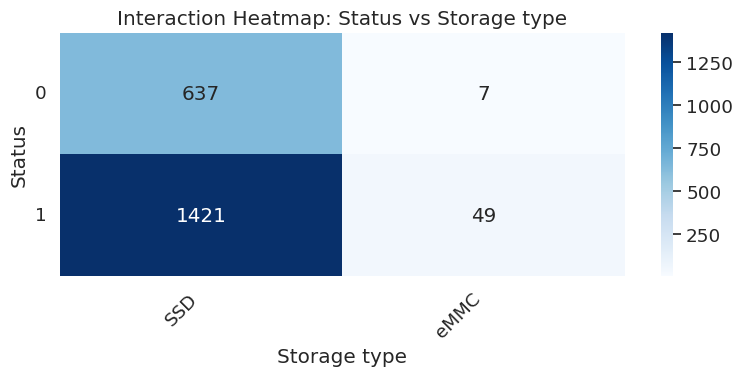

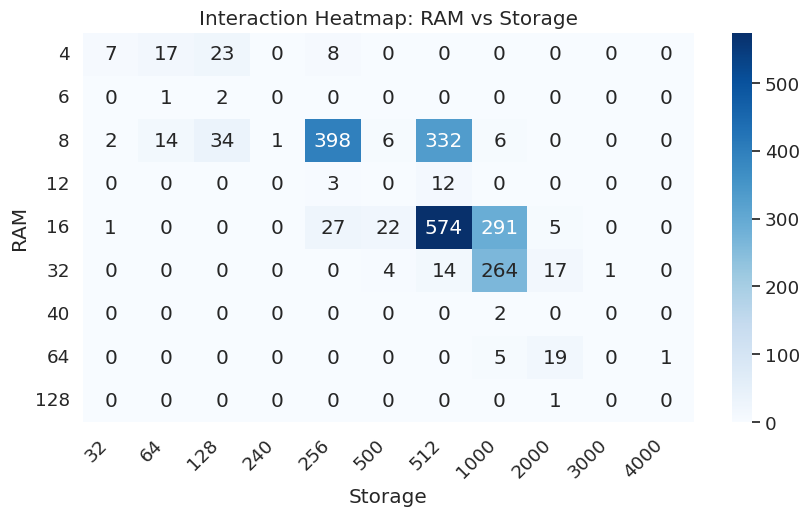

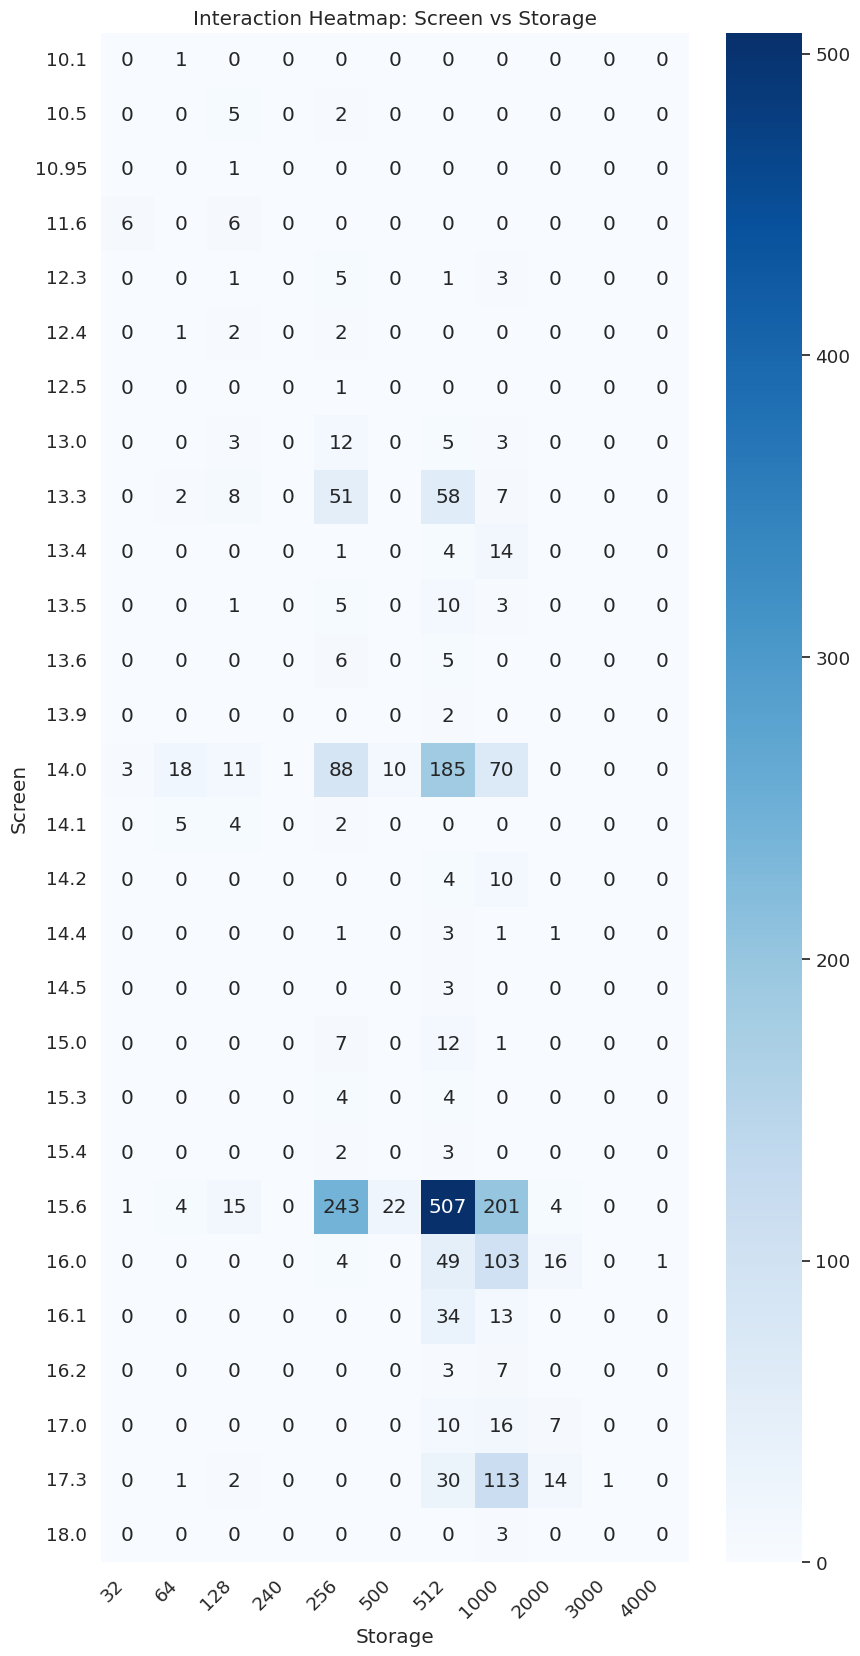

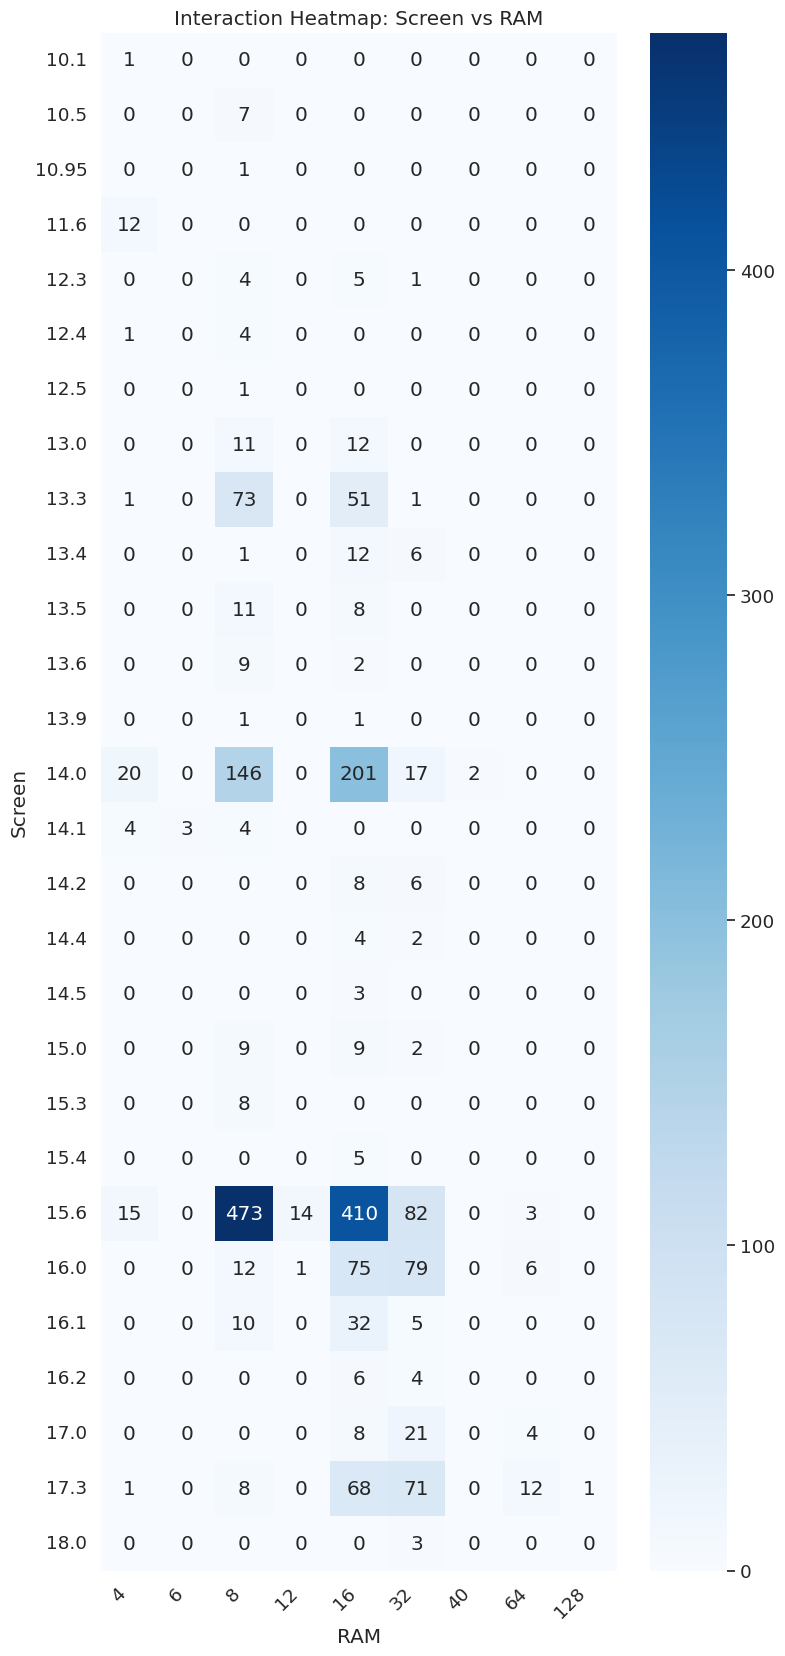

In [30]:
# feature pairs
smart_heatmap_pairs = [
    ('Brand', 'CPU'),
    ('Brand', 'Storage type'),
    ('CPU', 'Storage type'),
    ('Status', 'Brand'),
    ('Status', 'Storage type'),
    ('RAM', 'Storage'),
    ('Screen', 'Storage'),
    ('Screen', 'RAM')
]

for feat1, feat2 in smart_heatmap_pairs:
    if feat1 in df.columns and feat2 in df.columns:
        ct = pd.crosstab(df[feat1], df[feat2])

        # Auto-scale heatmap size based on number of labels
        rows, cols = ct.shape
        fig_width = max(8, cols * 0.8)
        fig_height = max(4, rows * 0.6)

        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(ct, annot=True, cmap="Blues", fmt='g')
        plt.title(f"Interaction Heatmap: {feat1} vs {feat2}")
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()


In [31]:
import matplotlib.gridspec as gridspec # Gridspec for more flexibiity in subplot.

# Feature pairs to visualize
smart_heatmap_pairs = [
    ('Brand', 'CPU'),
    ('Brand', 'Storage type'),
    ('CPU', 'Storage type'),
    ('Status', 'Brand'),
    ('Status', 'Storage type'),
    ('RAM', 'Storage'),
    ('Screen', 'Storage'),
    ('Screen', 'RAM')
]

# Store figures to assemble later
fig = plt.figure(figsize=(18, 16))
gs = gridspec.GridSpec(len(smart_heatmap_pairs), 1, figure=fig)
new_feature_names = []

for i, (feat1, feat2) in enumerate(smart_heatmap_pairs):
    if feat1 in df.columns and feat2 in df.columns:
        ct = pd.crosstab(df[feat1], df[feat2])

        # Evaluate skew (are most values concentrated in a few cells?) & Skew ratio tells how much the distribution of a variable is skewed.
        max_val = ct.to_numpy().max()
        skew_ratio = max_val / ct.to_numpy().sum()

        # Save heatmap subplot
        ax = fig.add_subplot(gs[i])
        sns.heatmap(ct, annot=True, cmap="Blues", fmt='g', ax=ax) # fmt for integer formatting & ax to specify the axes
        ax.set_title(f"{feat1} vs {feat2}")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

        # If skewed enough, create new interaction feature
        if skew_ratio > 0.3:  # Threshold: 30% of values in a single cell
            col_name = f"{feat1}_{feat2}_combo"
            df[col_name] = df[feat1].astype(str) + '_' + df[feat2].astype(str)
            new_feature_names.append(col_name)

plt.tight_layout()
fig.savefig("all_interaction_heatmaps.png")
plt.close(fig)

print(f"Created {len(new_feature_names)} new interaction features:")
print(new_feature_names)


/tmp/ipython-input-31-2226689465.py:41: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


Created 2 new interaction features:
['CPU_Storage type_combo', 'Status_Storage type_combo']


In [32]:
#Keep otion of combing RAM and storage open if model doesn't give good results

In [33]:
df['Brand_Storage type_combo'] = df['Brand'].astype(str) + '_' + df['Storage type'].astype(str)

In [34]:

#  Check Cardinality of Categorical Features

# Cardinality refers to the number of unique values in a categorical column.

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nCardinality of Categorical Columns:")
for col in categorical_cols:
    num_unique = df[col].nunique()
    print(f"- {col}: {num_unique} unique values")

    # Optionally, print the top few value counts for insight
    # print(df[col].value_counts().head())
    # print("-" * 20)

# Identify columns above a certain threshold (adjust as needed)
high_cardinality_threshold = 50 # Example threshold

high_cardinality_features = [col for col in categorical_cols if df[col].nunique() > high_cardinality_threshold]

print(f"\nCategorical columns with more than {high_cardinality_threshold} unique values: {high_cardinality_features}")

# To prevent curse of dimensionality which means too many features for the number of samples, we can drop high cardinality features.


Cardinality of Categorical Columns:
- Laptop: 2114 unique values
- Brand: 27 unique values
- Model: 119 unique values
- CPU: 27 unique values
- Storage type: 2 unique values
- CPU_Storage type_combo: 36 unique values
- Status_Storage type_combo: 4 unique values
- Brand_Storage type_combo: 36 unique values

Categorical columns with more than 50 unique values: ['Laptop', 'Model']


In [35]:
from itertools import combinations

def compute_skew_ratios(df, min_unique=2):
    # Select only categorical features
    cat_cols = df.select_dtypes(include='object').columns.tolist()
    results = []

    # Check all unique pairs of categorical columns
    for col1, col2 in combinations(cat_cols, 2):
        if df[col1].nunique() >= min_unique and df[col2].nunique() >= min_unique:
            crosstab = pd.crosstab(df[col1], df[col2])
            total = crosstab.to_numpy().sum()
            max_cell = crosstab.to_numpy().max()
            skew_ratio = max_cell / total
            results.append({
                'Feature 1': col1,
                'Feature 2': col2,
                'Skew Ratio': round(skew_ratio, 4),
                'Max Cell Count': int(max_cell),
                'Total': int(total),
                'Unique Combos': crosstab.size
            })

    return pd.DataFrame(results).sort_values(by='Skew Ratio', ascending=False).reset_index(drop=True)

# Example usage:
skew_df = compute_skew_ratios(df)
display(skew_df)


Feature 1                  Feature 2  Skew Ratio  \
0                Storage type  Status_Storage type_combo      0.6722   
1                         CPU     CPU_Storage type_combo      0.3311   
2                         CPU               Storage type      0.3311   
3                Storage type     CPU_Storage type_combo      0.3311   
4                         CPU  Status_Storage type_combo      0.1930   
5      CPU_Storage type_combo  Status_Storage type_combo      0.1930   
6                Storage type   Brand_Storage type_combo      0.1845   
7                       Brand   Brand_Storage type_combo      0.1845   
8                       Brand               Storage type      0.1845   
9                       Brand  Status_Storage type_combo      0.1310   
10  Status_Storage type_combo   Brand_Storage type_combo      0.1310   
11                      Brand                        CPU      0.1093   
12                      Brand     CPU_Storage type_combo      0.1093   
13                        CPU   Brand_Storage type_combo      0.1093   
14     CPU_Storage type_combo   Brand_Storage type_combo      0.1093   
15                      Model               Storage type      0.0539   
16                      Model   Brand_Storage type_combo      0.0539   
17                      Brand                      Model      0.0539   
18                      Model  Status_Storage type_combo      0.0511   
19                      Model                        CPU      0.0213   
20                      Model     CPU_Storage type_combo      0.0213   
21                     Laptop  Status_Storage type_combo      0.0005   
22                     Laptop   Brand_Storage type_combo      0.0005   
23                     Laptop     CPU_Storage type_combo      0.0005   
24                     Laptop                      Brand      0.0005   
25                     Laptop                      Model      0.0005   
26                     Laptop                        CPU      0.0005   
27                     Laptop               Storage type      0.0005   

    Max Cell Count  Total  Unique Combos  
0             1421   2114              8  
1              700   2114            972  
2              700   2114             54  
3              700   2114             72  
4              408   2114            108  
5              408   2114            144  
6              390   2114             72  
7              390   2114            972  
8              390   2114             54  
9              277   2114            108  
10             277   2114            144  
11             231   2114            729  
12             231   2114            972  
13             231   2114            972  
14             231   2114           1296  
15             114   2114            238  
16             114   2114           4284  
17             114   2114           3213  
18             108   2114            476  
19              45   2114           3213  
20              45   2114           4284  
21               1   2114           8456  
22               1   2114          76104  
23               1   2114          76104  
24               1   2114          57078  
25               1   2114         251566  
26               1   2114          57078  
27               1   2114           4228

In [36]:
df.head()

Laptop  Status   Brand  \
0  ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...       1    Asus   
1  Alurin Go Start Intel Celeron N4020/8GB/256GB ...       1  Alurin   
2  ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...       1    Asus   
3  MSI Katana GF66 12UC-082XES Intel Core i7-1270...       1     MSI   
4  HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...       1      HP   

        Model            CPU  RAM  Storage Storage type  Screen  Touch  \
0  ExpertBook  Intel Core i5    8      512          SSD    15.6      0   
1          Go  Intel Celeron    8      256          SSD    15.6      0   
2  ExpertBook  Intel Core i3    8      256          SSD    15.6      0   
3      Katana  Intel Core i7   16     1000          SSD    15.6      0   
4         15S  Intel Core i5   16      512          SSD    15.6      0   

   Final Price  Log Final Price CPU_Storage type_combo  \
0      1009.00         6.917706      Intel Core i5_SSD   
1       299.00         5.703782      Intel Celeron_SSD   
2       789.00         6.672033      Intel Core i3_SSD   
3      1199.00         7.090077      Intel Core i7_SSD   
4       669.01         6.507293      Intel Core i5_SSD   

  Status_Storage type_combo Brand_Storage type_combo  
0                     1_SSD                 Asus_SSD  
1                     1_SSD               Alurin_SSD  
2                     1_SSD                 Asus_SSD  
3                     1_SSD                  MSI_SSD  
4                     1_SSD                   HP_SSD

In [37]:


# Identify columns that start with 'Laptop_'
laptop_columns = [col for col in df.columns if col.startswith('Laptop_')]

if laptop_columns: # Check if any 'Laptop_' columns were found
    print(f"\nIdentified {len(laptop_columns)} columns starting with 'Laptop_' to drop.")
    # Drop these columns
    df.drop(columns=laptop_columns, inplace=True)
    print("\nDataFrame shape after dropping 'Laptop_' columns:")
    df.info()
else:
    print("\nNo columns starting with 'Laptop_' found to drop.")

# %%


No columns starting with 'Laptop_' found to drop.


In [38]:
df.head(2)

Laptop  Status   Brand  \
0  ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...       1    Asus   
1  Alurin Go Start Intel Celeron N4020/8GB/256GB ...       1  Alurin   

        Model            CPU  RAM  Storage Storage type  Screen  Touch  \
0  ExpertBook  Intel Core i5    8      512          SSD    15.6      0   
1          Go  Intel Celeron    8      256          SSD    15.6      0   

   Final Price  Log Final Price CPU_Storage type_combo  \
0       1009.0         6.917706      Intel Core i5_SSD   
1        299.0         5.703782      Intel Celeron_SSD   

  Status_Storage type_combo Brand_Storage type_combo  
0                     1_SSD                 Asus_SSD  
1                     1_SSD               Alurin_SSD

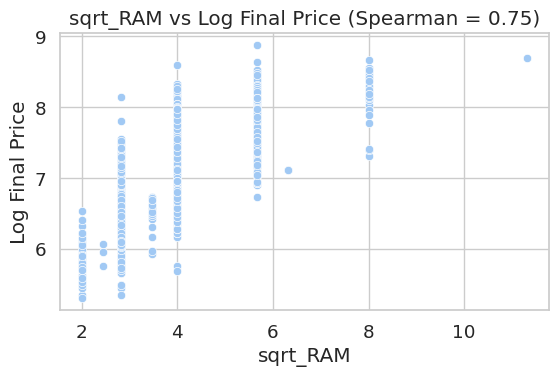

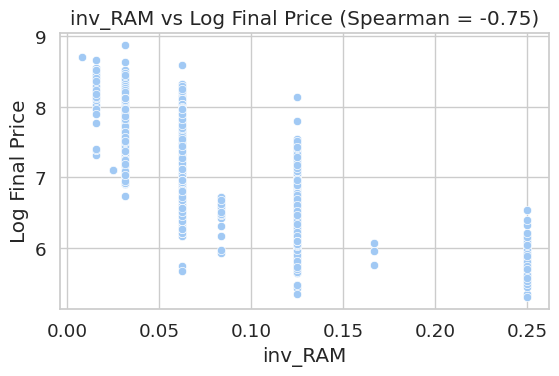

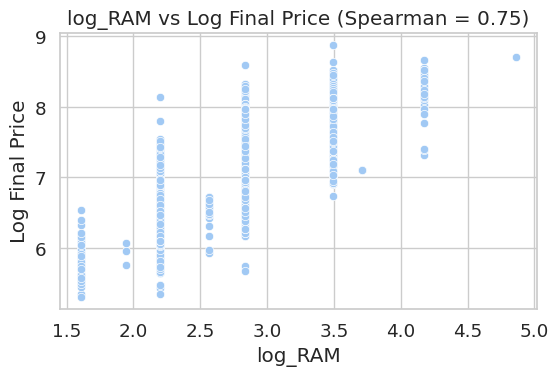

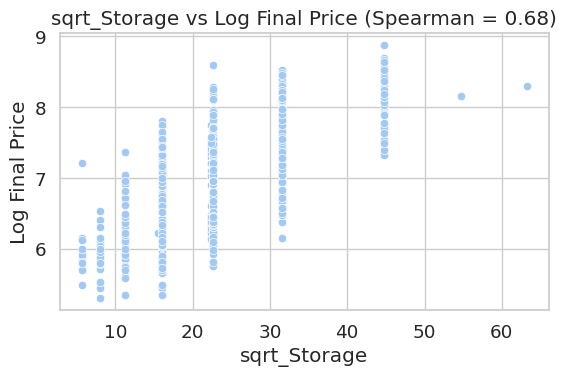

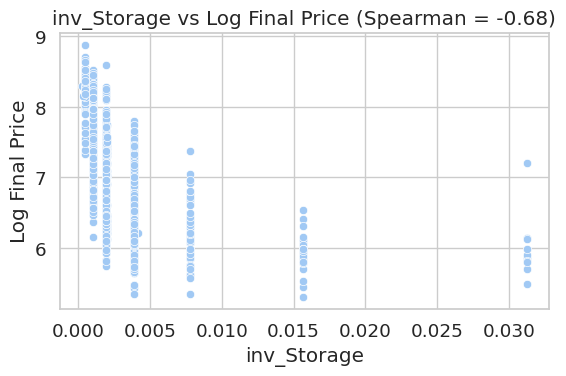

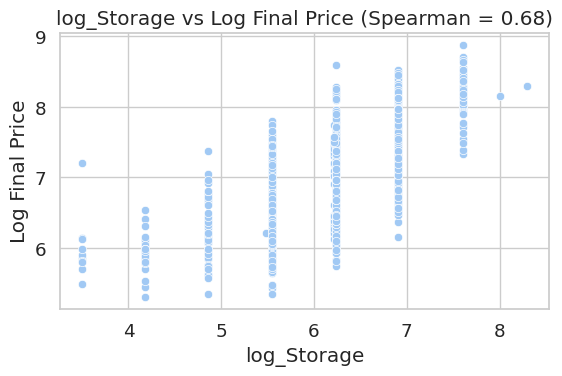

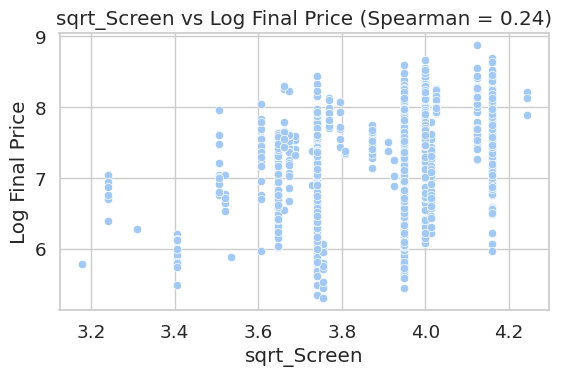

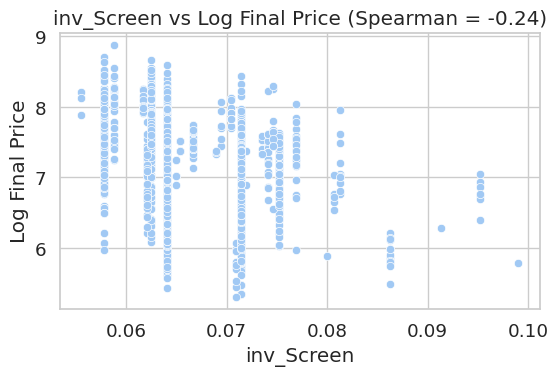

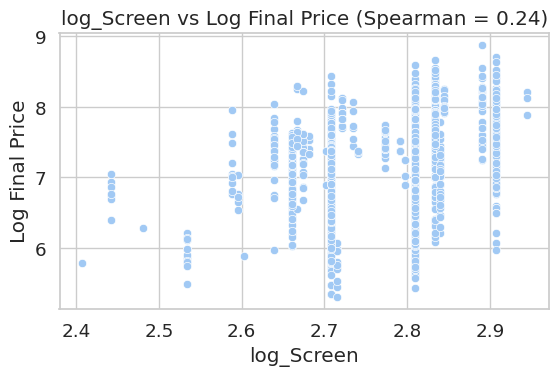

In [39]:
# Nonlinear Transformations (√x, 1/x, log(x))

nonlinear_transforms = ['RAM', 'Storage', 'Screen']

df_nonlinear = df.copy()
for col in nonlinear_transforms:
    if col in df_nonlinear.columns:
        df_nonlinear[f'sqrt_{col}'] = np.sqrt(df_nonlinear[col]) # Square root transformation  to compress range
        df_nonlinear[f'inv_{col}'] = 1 / (df_nonlinear[col] + 1e-6) # Adding a small constant to avoid division by zero
        df_nonlinear[f'log_{col}'] = np.log1p(df_nonlinear[col]) # log(x) to stabilize variance and reduce skew



# Import spearmanr from scipy.stats
from scipy.stats import spearmanr # Spearman measures the strength and direction of association between two ranked variables.

for col in nonlinear_transforms:
    for suffix in ['sqrt', 'inv', 'log']:
        col_name = f'{suffix}_{col}'
        if col_name in df_nonlinear.columns:
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=df_nonlinear[col_name], y=df_nonlinear['Log Final Price'])
            # Use the imported spearmanr function
            corr, _ = spearmanr(df_nonlinear[col_name], df_nonlinear['Log Final Price'])
            plt.title(f'{col_name} vs Log Final Price (Spearman = {corr:.2f})')
            plt.xlabel(col_name)
            plt.ylabel('Log Final Price')
            plt.tight_layout()
            plt.show()

In [40]:
# Apply Chosen Nonlinear Transformations

# Based on analysis: apply log transformation to RAM and Storage
cols_to_log_transform = ['RAM', 'Storage']

for col in cols_to_log_transform:
    if col in df.columns:
        # Apply Log transformation (using log1p for handling zero values)
        # Create a new column for the transformed feature
        df[f'log_{col}'] = np.log1p(df[col])

# Display info to confirm the new columns (log_RAM, log_Storage) have been added
print("\nDataFrame Info After Adding Log Transformed Features:")
print(df.info())

# Original features are kept and we have not chosen to drop them yet because they might be useful for the model.


DataFrame Info After Adding Log Transformed Features:
<class 'pandas.core.frame.DataFrame'>
Index: 2114 entries, 0 to 2159
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Laptop                     2114 non-null   object 
 1   Status                     2114 non-null   int64  
 2   Brand                      2114 non-null   object 
 3   Model                      2114 non-null   object 
 4   CPU                        2114 non-null   object 
 5   RAM                        2114 non-null   int64  
 6   Storage                    2114 non-null   int64  
 7   Storage type               2114 non-null   object 
 8   Screen                     2114 non-null   float64
 9   Touch                      2114 non-null   int64  
 10  Final Price                2114 non-null   float64
 11  Log Final Price            2114 non-null   float64
 12  CPU_Storage type_combo     2114 non-null   object 
 13

In [41]:


# Identify non-numeric columns.
#  typically 'object' or 'category' dtypes.
non_numeric_cols = df.select_dtypes(include=['object', 'category']).columns

print(f"Non-numeric columns identified for one-hot encoding: {list(non_numeric_cols)}")

# Perform one-hot encoding on the entire DataFrame to convert categorical variables into a format that algorithms can understand.
# pd.get_dummies automatically processes only the non-numeric columns.
# 'drop_first=True' drops the first category of each feature to prevent multicollinearity.
df_encoded = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True)

# Update the DataFrame with the encoded version.
df = df_encoded.copy()

print("\nDataFrame after one-hot encoding:")
df.info()

# Display the first few rows to verify the changes.
print("\nFirst 5 rows of the encoded DataFrame:")
display(df.head())

Non-numeric columns identified for one-hot encoding: ['Laptop', 'Brand', 'Model', 'CPU', 'Storage type', 'CPU_Storage type_combo', 'Status_Storage type_combo', 'Brand_Storage type_combo']

DataFrame after one-hot encoding:
<class 'pandas.core.frame.DataFrame'>
Index: 2114 entries, 0 to 2159
Columns: 2366 entries, Status to Brand_Storage type_combo_Vant_SSD
dtypes: bool(2357), float64(5), int64(4)
memory usage: 4.9 MB

First 5 rows of the encoded DataFrame:


Status  RAM  Storage  Screen  Touch  Final Price  Log Final Price  \
0       1    8      512    15.6      0      1009.00         6.917706   
1       1    8      256    15.6      0       299.00         5.703782   
2       1    8      256    15.6      0       789.00         6.672033   
3       1   16     1000    15.6      0      1199.00         7.090077   
4       1   16      512    15.6      0       669.01         6.507293   

    log_RAM  log_Storage  \
0  2.197225     6.240276   
1  2.197225     5.549076   
2  2.197225     5.549076   
3  2.833213     6.908755   
4  2.833213     6.240276   

   Laptop_ASUS BR1100FKA-BP1185XA Intel Celeron N4500/4GB/128GB SSD/11.6" Táctil  \
0                                              False                               
1                                              False                               
2                                              False                               
3                                              False                               
4                                              False                               

   ...  Brand_Storage type_combo_Primux_SSD  \
0  ...                                False   
1  ...                                False   
2  ...                                False   
3  ...                                False   
4  ...                                False   

   Brand_Storage type_combo_Prixton_eMMC  Brand_Storage type_combo_Razer_SSD  \
0                                  False                               False   
1                                  False                               False   
2                                  False                               False   
3                                  False                               False   
4                                  False                               False   

   Brand_Storage type_combo_Realme_SSD  Brand_Storage type_combo_Samsung_SSD  \
0                                False                                 False   
1                                False                                 False   
2                                False                                 False   
3                                False                                 False   
4                                False                                 False   

   Brand_Storage type_combo_Samsung_eMMC  \
0                                  False   
1                                  False   
2                                  False   
3                                  False   
4                                  False   

   Brand_Storage type_combo_Thomson_SSD  \
0                                 False   
1                                 False   
2                                 False   
3                                 False   
4                                 False   

   Brand_Storage type_combo_Thomson_eMMC  \
0                                  False   
1                                  False   
2                                  False   
3                                  False   
4                                  False   

   Brand_Storage type_combo_Toshiba_SSD  Brand_Storage type_combo_Vant_SSD  
0                                 False                              False  
1                                 False                              False  
2                                 False                              False  
3                                 False                              False  
4                                 False                              False  

[5 rows x 2366 columns]

In [42]:
####  Feature Space Lifting (Polynomial Expansion)
# Polynomial expansion is a technique to create new features by generating polynomial combinations of existing features.


X = df.drop(columns=['Final Price', 'Log Final Price'])
X_numeric = X.select_dtypes(include=np.number)

# PolynomialFeatures is used to create squared terms and interaction terms.
poly = PolynomialFeatures(degree=2, include_bias=False)
# Fits the polynomial transformer to your numeric data and transforms it & X_poly becomes numpy array with polynomial features.
X_poly = poly.fit_transform(X_numeric)
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X_numeric.columns))  # Converts the expanded array into a pandas DataFrame and returns the new feature names.

print(f"Expanded from {X_numeric.shape[1]} to {X_poly_df.shape[1]} features") # Tells you how much the feature space has grown

Expanded from 7 to 35 features


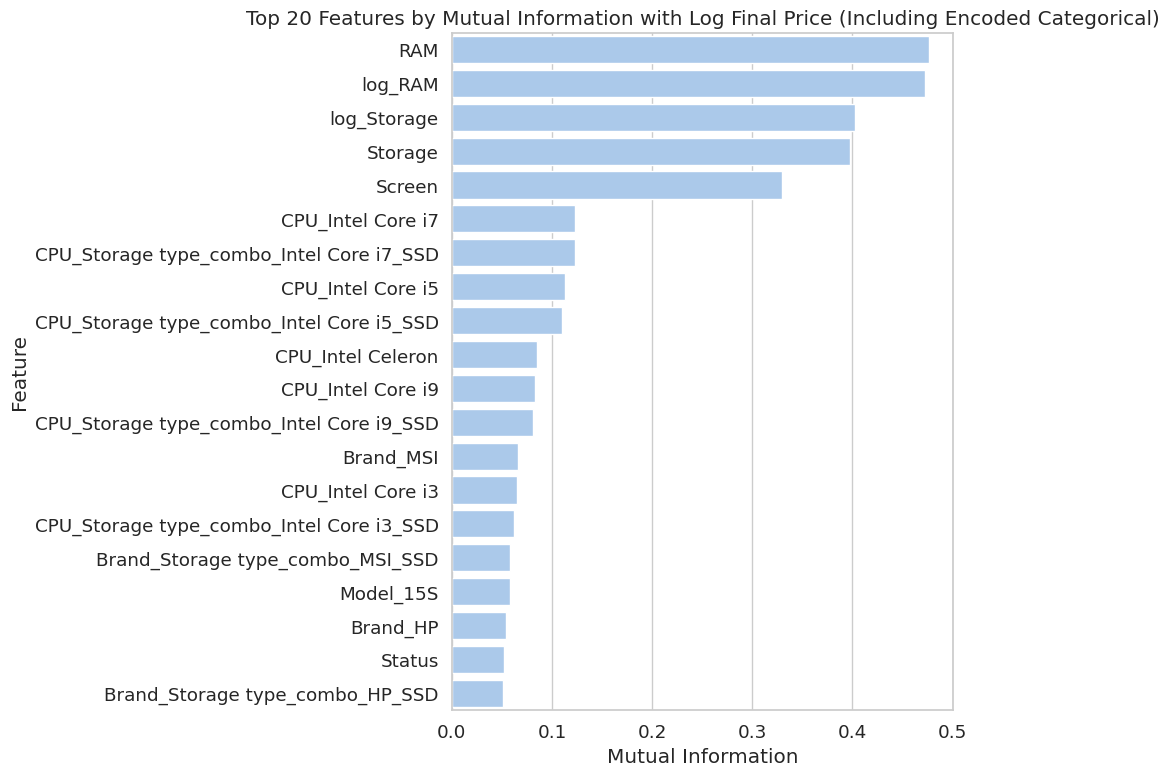

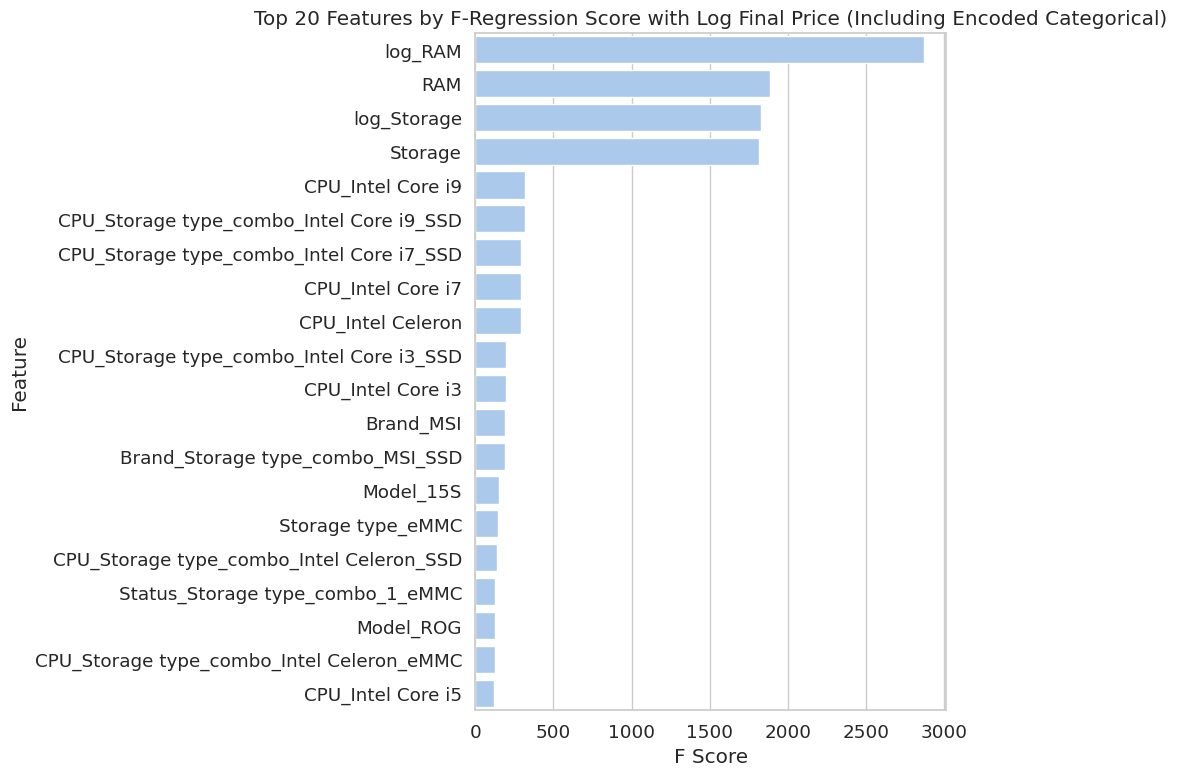

In [43]:

# Mutual Information Feature Ranking
#Mutual Information is a measure from information theory that quantifies the amount of information one random variable contains about another. And it detects nonlinear relationships.

# Use the df_encoded DataFrame which contains both numerical and one-hot encoded features

X = df_encoded.drop(columns=['Final Price', 'Log Final Price'])
y_log = df_encoded['Log Final Price']

# Ensure all columns in X are numeric (should be the case after get_dummies)
# X_numeric is not needed here as X already contains only numeric types after drop and encoding
# X_numeric = X.select_dtypes(include=np.number) # Original line (no longer needed here)

# mi_scores = mutual_info_regression(X_poly_df, y_log) # Computes mutual information (MI) between each feature in X and y_log.
# Use the features from the encoded dataframe directly for ranking
mi_scores = mutual_info_regression(X, y_log)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False) # Converts the MI scores into a pandas Series and sorts them in descending order.


plt.figure(figsize=(10, 8))
sns.barplot(x=mi_series.values[:20], y=mi_series.index[:20])
plt.title("Top 20 Features by Mutual Information with Log Final Price (Including Encoded Categorical)") # Updated title
plt.xlabel("Mutual Information")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


#### F-Regression Feature Ranking
## F-Regression measures the strength of the linear relationship between each feature and the target.


# Creates a feature selector using F-regression & f_regression measures linear correlation between features and target.
selector = SelectKBest(score_func=f_regression, k=20)
# selector.fit(X_poly_df, y_log) # Original line using polynomial features
# Use the features from the encoded dataframe directly for fitting the selector
selector.fit(X, y_log)
f_scores = selector.scores_ # F-scores indicates the strength of the linear relationship between each feature and the target variable.
# Same as before as mi_series, but using F-scores.
f_series = pd.Series(f_scores, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=f_series.values[:20], y=f_series.index[:20])
plt.title("Top 20 Features by F-Regression Score with Log Final Price (Including Encoded Categorical)") # Updated title
plt.xlabel("F Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [44]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression

#  Run Mutual Information and F-regression
mi_selector = SelectKBest(score_func=mutual_info_regression, k=20)
f_selector = SelectKBest(score_func=f_regression, k=20)

#  Fit both selectors to the expanded feature set
mi_selector.fit(X_poly_df, y_log)
f_selector.fit(X_poly_df, y_log)

#  Get selected feature names
mi_features = X_poly_df.columns[mi_selector.get_support()] # get_support() returns a boolean mask indicating which features were selected.
f_features = X_poly_df.columns[f_selector.get_support()]

#  Final selected feature names (intersection)
selected_cols = list(set(mi_features).intersection(set(f_features)))
print(f"Selected {len(selected_cols)} features common to MI & F-regression.")

#  Final input matrix
X_selected = X_poly_df[selected_cols]


Selected 19 features common to MI & F-regression.


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

#VIF helps you identify predictors that are highly correlated with others, so you can improve your regression model by addressing multicollinearity.
# Function to calculate Variance Inflation Factor (VIF) for each feature

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values(by='VIF', ascending=False)

# Function to drop features with high VIF iteratively & Repeats until all features have VIF ≤ threshold.
def drop_high_vif(X, threshold=5.0): # VIF > 5 has high multicollinearity.
    while True:
        vif_df = calculate_vif(X)
        max_vif = vif_df['VIF'].max()
        if max_vif > threshold:
            drop_feature = vif_df.iloc[0]['feature']
            print(f"Dropping {drop_feature} due to high VIF ({max_vif:.2f})")
            X = X.drop(columns=drop_feature)
        else:
            break
    return X

# Apply VIF filtering for linear model input
X_selected_linear = drop_high_vif(X_selected)


Dropping RAM due to high VIF (7131635.83)
Dropping Storage due to high VIF (295400.86)
Dropping log_RAM log_Storage due to high VIF (167466.54)
Dropping log_RAM due to high VIF (140080.47)
Dropping RAM log_Storage due to high VIF (53193.49)
Dropping Screen log_RAM due to high VIF (45577.97)
Dropping Storage log_Storage due to high VIF (6071.51)
Dropping Storage log_RAM due to high VIF (1932.10)
Dropping log_Storage^2 due to high VIF (1878.43)
Dropping RAM Screen due to high VIF (1227.87)
Dropping log_RAM^2 due to high VIF (445.32)
Dropping Screen log_Storage due to high VIF (278.03)
Dropping RAM Storage due to high VIF (101.85)
Dropping Storage Screen due to high VIF (35.12)
Dropping RAM log_RAM due to high VIF (22.41)


In [46]:
X_selected_linear

Storage^2  log_Storage  Status RAM   RAM^2
0      262144.0     6.240276         8.0    64.0
1       65536.0     5.549076         8.0    64.0
2       65536.0     5.549076         8.0    64.0
3     1000000.0     6.908755        16.0   256.0
4      262144.0     6.240276        16.0   256.0
...         ...          ...         ...     ...
2109  1000000.0     6.908755         0.0   256.0
2110  1000000.0     6.908755         0.0   256.0
2111  1000000.0     6.908755         0.0  1024.0
2112  1000000.0     6.908755         0.0   256.0
2113    65536.0     5.549076         0.0   256.0

[2114 rows x 4 columns]

In [47]:
from sklearn.model_selection import train_test_split


# X_selected_linear = final feature set for linear regression
# y_log = log-transformed target

#  First split - hold out final test set (20%) &  Reserve 20% of the data as the test set, which we will only use after finalizing the model.
X_temp, X_test, y_temp, y_test = train_test_split(
    X_selected_linear, y_log, test_size=0.2, random_state=42
)

# Split remaining 80% into train (60%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42  # 0.25 of 80% = 20%
)

# Check the sizes
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")



Training set: 1268 samples
Validation set: 423 samples
Test set: 423 samples


In [48]:
### Linear Regression: Training & Evaluation

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# MSE is average squared difference between actual and predicted values. MAE is average absolute difference.
# R² tells how well the model explains the variance in the target.

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on validation and test sets
y_val_pred = lr_model.predict(X_val)
y_test_pred = lr_model.predict(X_test)

In [49]:
# Evaluate on validation set
# Validation set is purpose for hyperparameter tuning. A hyperparameter is a value you choose before running a machine learning algorithm that affects how the algorithm learns.For eg KNN.
print("--- Validation Set Performance ---")
print("R² Score:", r2_score(y_val, y_val_pred))
# Calculate RMSE by taking the square root of the MSE
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_val_pred)))
print("MAE:", mean_absolute_error(y_val, y_val_pred))

--- Validation Set Performance ---
R² Score: 0.5010609470380312
RMSE: 0.4415595651000204
MAE: 0.3570054524441199


In [50]:
# Evaluate on test set (only once!)
print("\n--- Test Set Final Evaluation ---")
print("R² Score:", r2_score(y_test, y_test_pred))
# Calculate RMSE by taking the square root of the MSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred))) # Changed this line
print("MAE:", mean_absolute_error(y_test, y_test_pred))


--- Test Set Final Evaluation ---
R² Score: 0.5169162736852488
RMSE: 0.4368110867769015
MAE: 0.3533508911858494


In [51]:
#R² Score: 0.47 means the model is doing okay, but there's definitely room for improvement.
# RMSE = 0.48 tells on average, how the models prediction.
# MAE = 0.38 mesure on average error.

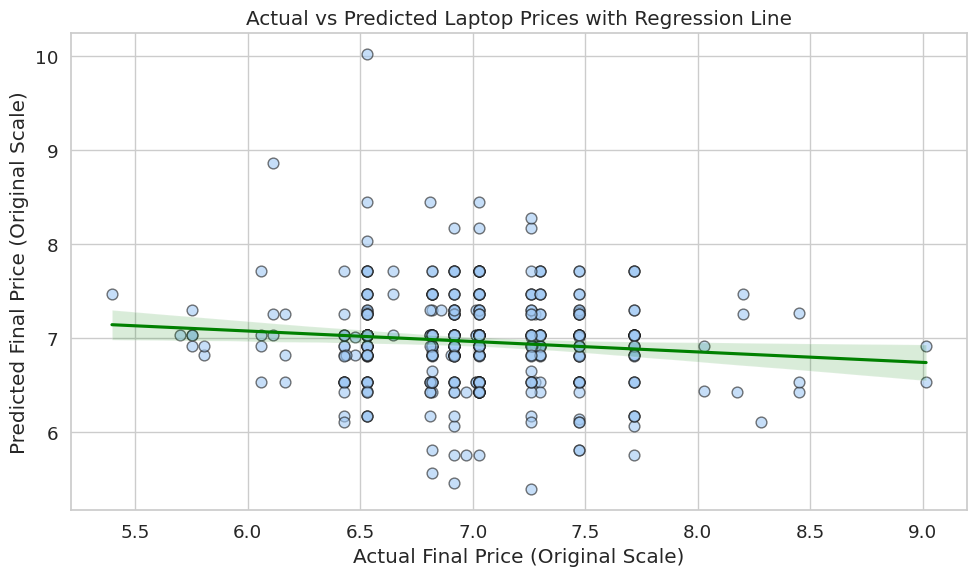

In [52]:
# Actual vs Predicted with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test_pred, y= y_val_pred, scatter_kws={'alpha': 0.6, 's': 60, 'edgecolor': 'k'}, line_kws={'color': 'green'})
plt.xlabel("Actual Final Price (Original Scale)")
plt.ylabel("Predicted Final Price (Original Scale)")
plt.title("Actual vs Predicted Laptop Prices with Regression Line")
plt.grid(True)
plt.tight_layout()
plt.show()

Training and evaluating models with tailored feature sets...

Tuning and evaluating Linear Regression...

Tuning and evaluating KNN...
Best params for KNN (Raw): {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
Best params for KNN (Log): {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}

Tuning and evaluating Decision Tree...
Best params for Decision Tree (Raw): {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
Best params for Decision Tree (Log): {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}

Tuning and evaluating Random Forest...
Best params for Random Forest (Raw): {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best params for Random Forest (Log): {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}

Tuning and evaluating SVR...
Best params for SVR (Raw): {'C': 10, 'epsilon

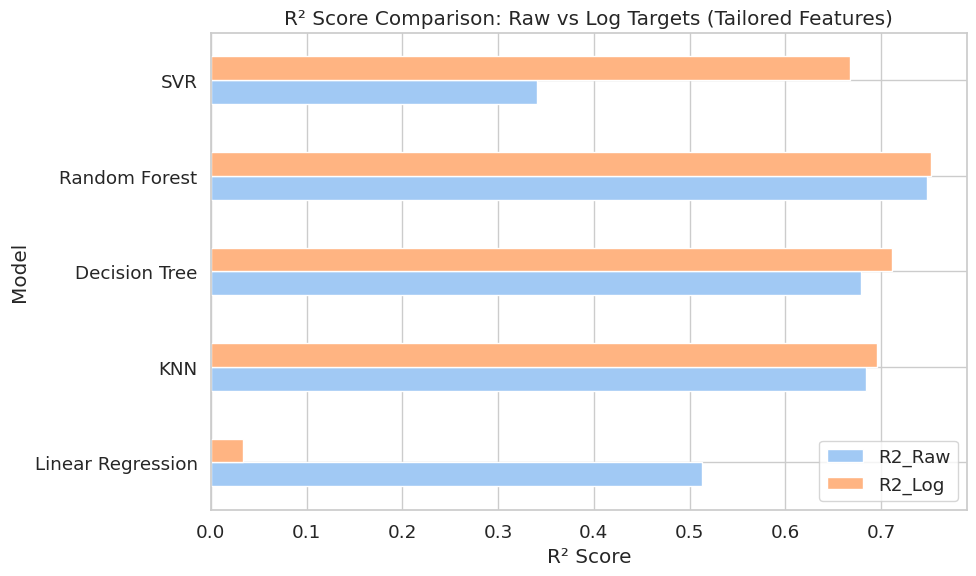

In [61]:
# --- Train and Evaluate Models with Tailored Feature Sets ---

print("Training and evaluating models with tailored feature sets...")

results_tailored_features = []

for name, model in tuned_models.items():
    print(f"\nTuning and evaluating {name}...")

    if name == 'Linear Regression':
        # Use Linear Regression feature set and splits
        X_train, X_val, y_train_raw, y_val_raw = X_train_lr, X_val_lr, y_train_raw_lr, y_val_raw_lr
        y_train_log, y_val_log = y_train_log_lr, y_val_log_lr
    else:
        # Use Tree/SVR feature set and splits
        X_train, X_val, y_train_raw, y_val_raw = X_train_tree_svr, X_val_tree_svr, y_train_raw_tree_svr, y_val_raw_tree_svr
        y_train_log, y_val_log = y_train_log_tree_svr, y_val_log_tree_svr

    # RAW target
    model.fit(X_train, y_train_raw)
    preds_raw = model.predict(X_val)
    if isinstance(model, GridSearchCV):
         print(f"Best params for {name} (Raw): {model.best_params_}")
    scores_raw = evaluate(y_val_raw, preds_raw)

    # LOG target
    model.fit(X_train, y_train_log)
    preds_log = model.predict(X_val)
    if isinstance(model, GridSearchCV):
        print(f"Best params for {name} (Log): {model.best_params_}")
    preds_log_real = np.expm1(preds_log)
    scores_log = evaluate(y_val_raw, preds_log_real)

    results_tailored_features.append({
        'Model': name,
        'R2_Raw': scores_raw['R²'], 'RMSE_Raw': scores_raw['RMSE'],
        'MAE_Raw': scores_raw['MAE'], 'MAPE_Raw': scores_raw['MAPE'],
        'R2_Log': scores_log['R²'], 'RMSE_Log': scores_log['RMSE'],
        'MAE_Log': scores_log['MAE'], 'MAPE_Log': scores_log['MAPE'],
    })

print("\n--- Results with Tailored Feature Selection ---")
results_tailored_df = pd.DataFrame(results_tailored_features).set_index('Model')
display(results_tailored_df.style.background_gradient(axis=0, cmap='viridis'))

# Plot R² scores side by side
results_tailored_df[['R2_Raw', 'R2_Log']].plot(kind='barh', figsize=(10, 6))
plt.title("R² Score Comparison: Raw vs Log Targets (Tailored Features)")
plt.xlabel("R² Score")
plt.grid(True)
plt.tight_layout()
plt.show()

Generating Actual vs Predicted plots for KNN, Decision Tree, and Random Forest (Log Transformed Target)...


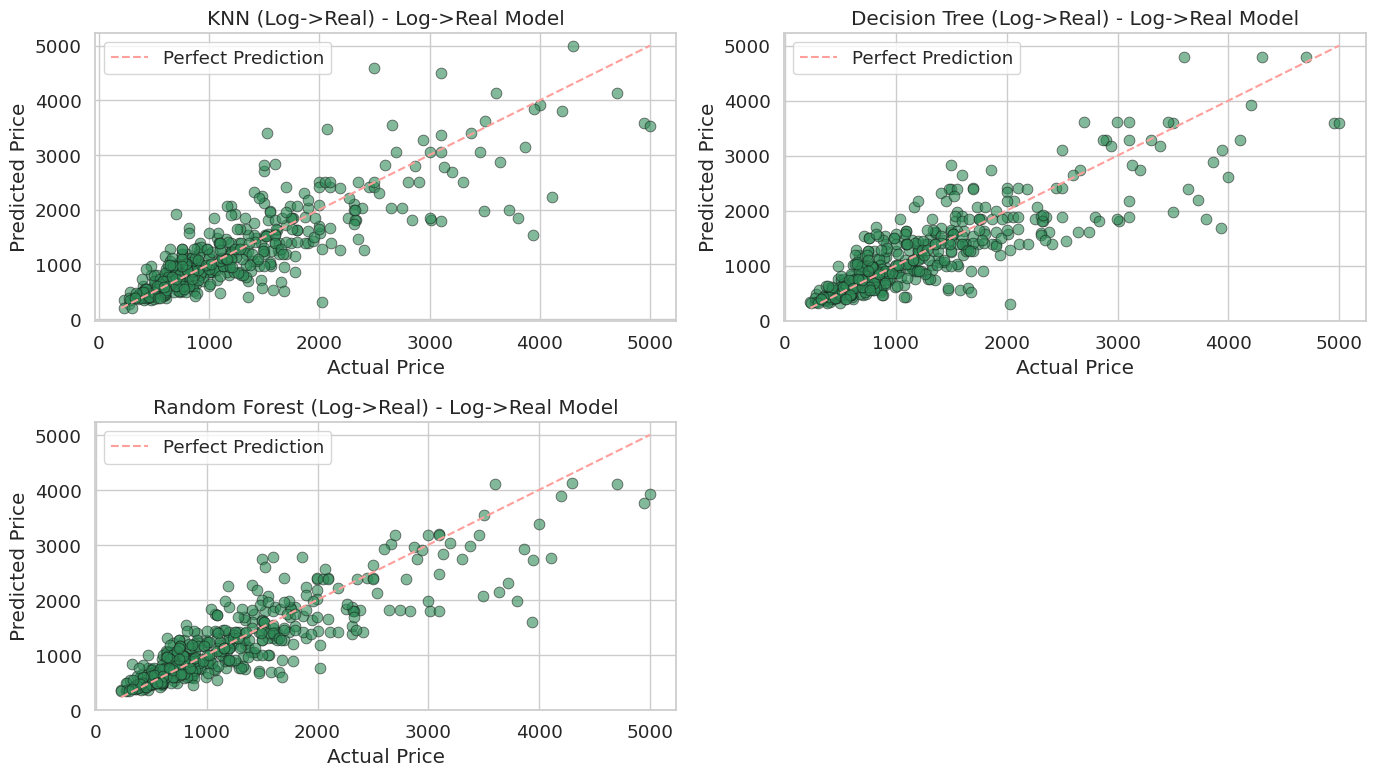

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the validation set for the tree-based models and SVR (which includes KNN, Decision Tree, Random Forest)
X_val_tree_svr = globals().get('X_val_tree_svr', None)
y_val_raw_tree_svr = globals().get('y_val_raw_tree_svr', None)

if X_val_tree_svr is None or y_val_raw_tree_svr is None:
    print("Validation data for tree-based models and SVR not found. Please ensure previous cells were run.")
else:
    # Define the models to plot
    models_to_plot = ['KNN', 'Decision Tree', 'Random Forest']

    # Get predictions for the specified models on the validation set (Log transformed target, converted back to original scale)
    predictions_log_real_subset = {}
    for name in models_to_plot:
        if name in tuned_models:
            # Predict on the validation set used for tree/svr models
            preds_log = tuned_models[name].predict(X_val_tree_svr)
            # Convert predictions back to the original scale
            predictions_log_real_subset[f'{name} (Log->Real)'] = np.expm1(preds_log)
        else:
            print(f"Model '{name}' not found in tuned_models.")


    def actual_vs_pred_plot_subset(pred_dict, title_suffix, color='seagreen'):
        n = len(pred_dict)
        if n == 0:
            print("No predictions to plot.")
            return

        ncols = 2
        nrows = (n + ncols - 1) // ncols # Calculate nrows correctly

        fig, axes = plt.subplots(nrows, ncols, figsize=(14, 4 * nrows))

        # Ensure axes is always a 2D array for easier iteration
        if nrows == 1 and ncols > 1:
             axes = axes.reshape(1, ncols)
        elif nrows > 1 and ncols == 1:
             axes = axes.reshape(nrows, 1)
        elif nrows == 1 and ncols == 1:
             axes = np.array([axes])


        for i, (model, preds) in enumerate(pred_dict.items()):
            row = i // ncols
            col = i % ncols
            ax = axes[row, col]

            sns.scatterplot(x=y_val_raw_tree_svr, y=preds, ax=ax, alpha=0.6,
                            edgecolor='k', s=60, color=color)
            # Add the perfect prediction line
            min_val = min(y_val_raw_tree_svr.min(), preds.min())
            max_val = max(y_val_raw_tree_svr.max(), preds.max())
            ax.plot([min_val, max_val],
                    [min_val, max_val], 'r--', label='Perfect Prediction')
            ax.set_title(f'{model} - {title_suffix}')
            ax.set_xlabel('Actual Price')
            ax.set_ylabel('Predicted Price')
            ax.legend()
            ax.grid(True)

        # Clean up extra subplot if any
        for i in range(n, nrows * ncols):
            row = i // ncols
            col = i % ncols
            if row < nrows and col < ncols:
                 fig.delaxes(axes[row, col])


        plt.tight_layout()
        plt.show()

    # 🔶 Plot Log-transformed model predictions (converted back) for the selected subset
    print("Generating Actual vs Predicted plots for KNN, Decision Tree, and Random Forest (Log Transformed Target)...")
    actual_vs_pred_plot_subset(predictions_log_real_subset, 'Log->Real Model', color='seagreen')

Training selected models on Raw and Log targets for plotting...
  Training KNN on Raw target...
    Best params (Raw): {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
  Training KNN on Log target...
    Best params (Log): {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
  Training Decision Tree on Raw target...
    Best params (Raw): {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
  Training Decision Tree on Log target...
    Best params (Log): {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
  Training Random Forest on Raw target...
    Best params (Raw): {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
  Training Random Forest on Log target...
    Best params (Log): {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}

Generating Actual vs Predicted plots (Log Transformed Tar

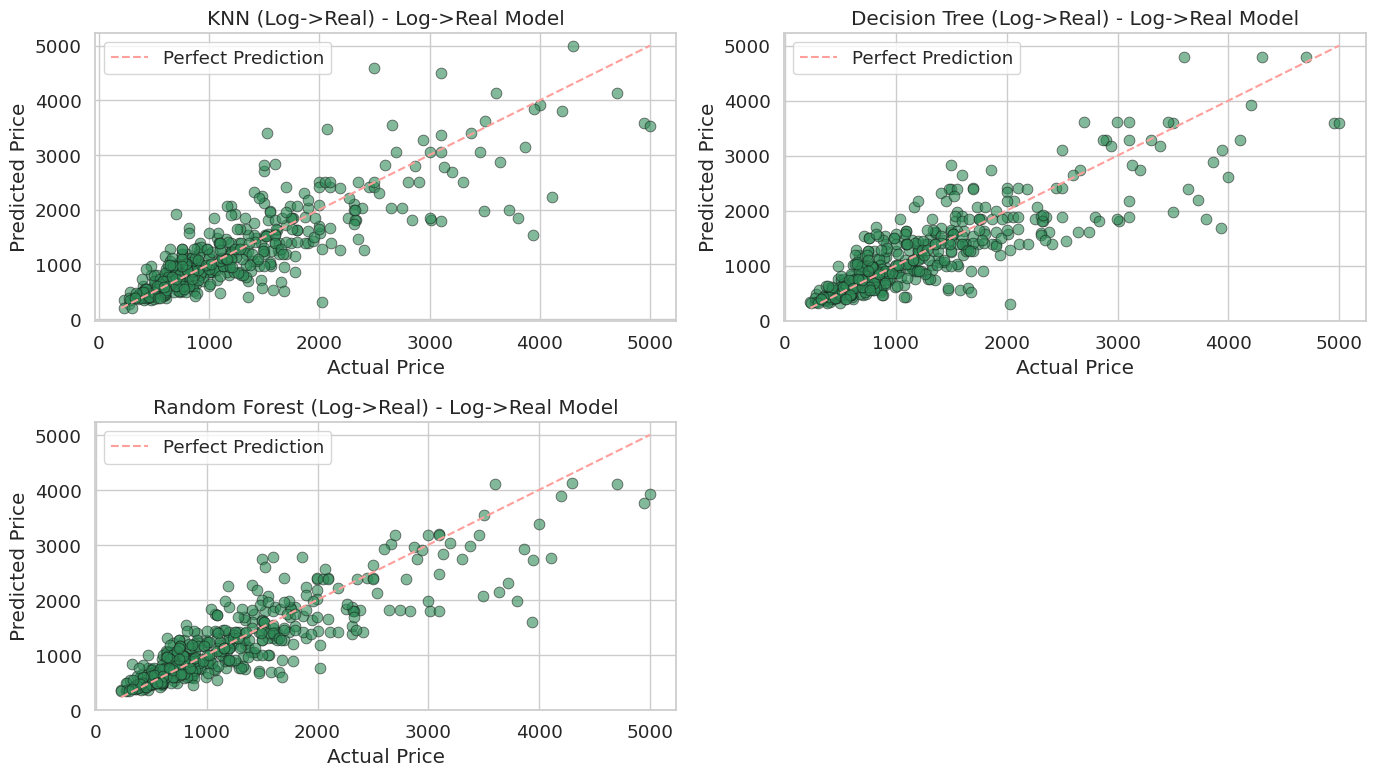


Generating Actual vs Predicted plots (Raw Target)...


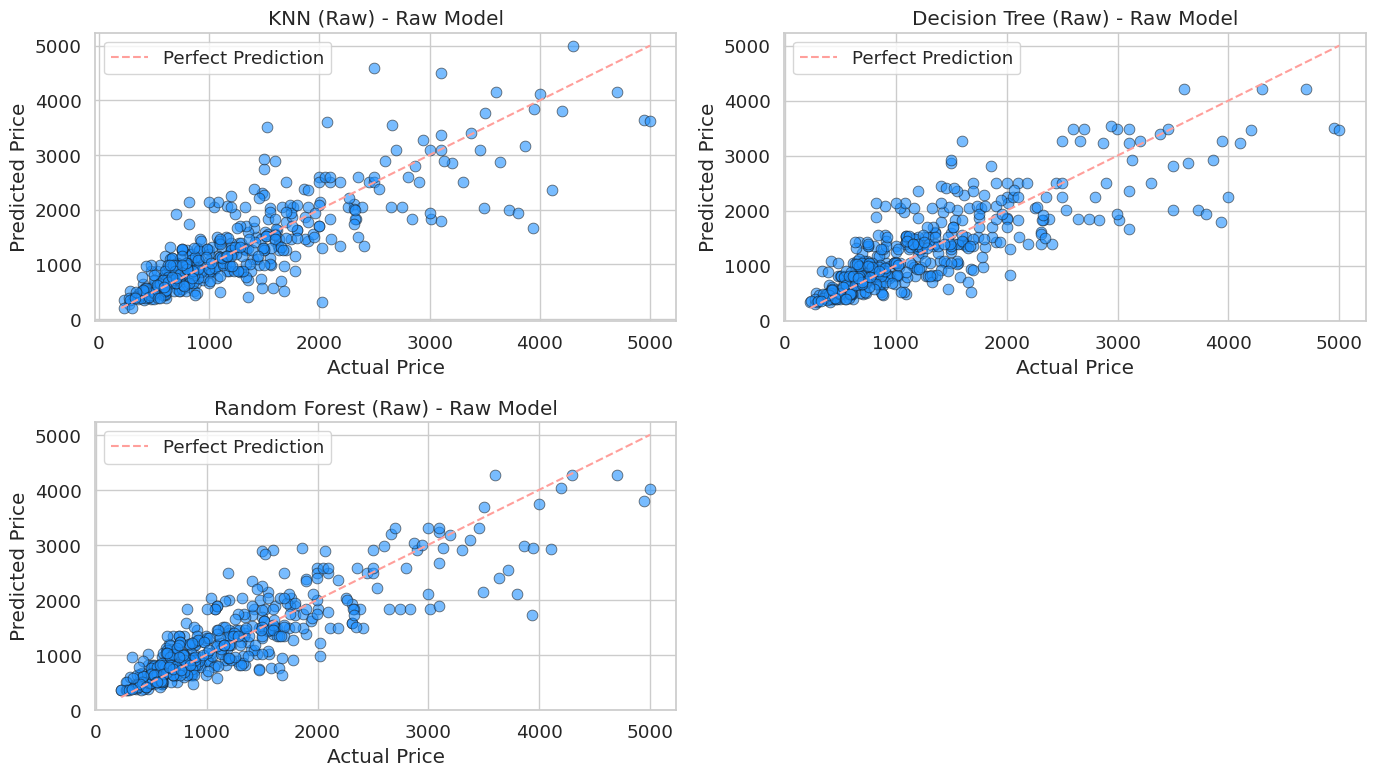

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Ensure the necessary data splits and tailored feature sets are available
X_train_tree_svr = globals().get('X_train_tree_svr', None)
X_val_tree_svr = globals().get('X_val_tree_svr', None)
y_train_raw_tree_svr = globals().get('y_train_raw_tree_svr', None)
y_val_raw_tree_svr = globals().get('y_val_raw_tree_svr', None)
y_val_log_tree_svr = globals().get('y_val_log_tree_svr', None)
X_train_lr = globals().get('X_train_lr', None)
X_val_lr = globals().get('X_val_lr', None)
y_train_raw_lr = globals().get('y_train_raw_lr', None)
y_val_raw_lr = globals().get('y_val_raw_lr', None)


if (X_train_tree_svr is None or X_val_tree_svr is None or y_train_raw_tree_svr is None or
    y_val_raw_tree_svr is None or y_val_log_tree_svr is None or X_train_lr is None or
    X_val_lr is None or y_train_raw_lr is None or y_val_raw_lr is None):
    print("Required data splits or tailored feature sets not found. Please ensure previous cells were run.")
else:
    # Define the models to plot (excluding Linear Regression and SVR for raw plots as per previous request)
    models_to_plot = ['KNN', 'Decision Tree', 'Random Forest']

    # Re-initialize and train models on the RAW target to get raw predictions
    # We will use the best hyperparameters found during the previous tuning phase for the raw target
    # This requires accessing the best_params_ from the GridSearchCV objects after they were trained on raw data.
    # Since the previous cell overwrote the tuned_models with log-trained models,
    # we need to re-run the training on raw data here for the models_to_plot.

    raw_tuned_models = {}
    log_tuned_models = {} # Store log-trained models for plotting as well


    print("Training selected models on Raw and Log targets for plotting...")



    # Define models and their parameter grids for re-training on raw target
    raw_models_to_train = {
        'KNN': KNeighborsRegressor(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42),
        'SVR': SVR() # Include SVR if needed later, but plot only selected ones
    }

    # Define parameter grids (can use the same as before or simplified for speed)
    param_grids = {
        'KNN': {'n_neighbors': [3, 5, 10, 15], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
        'Decision Tree': {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10], 'max_features': ['sqrt', 'log2']},
        'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10], 'max_features': ['sqrt', 'log2']},
        'SVR': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['rbf'], 'epsilon': [0.01, 0.1, 0.5]}
    }


    for name in models_to_plot:
        model = raw_models_to_train[name]
        params = param_grids[name]

        # Train on Raw target
        print(f"  Training {name} on Raw target...")
        # Use GridSearchCV to find best params and train
        grid_raw = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
        grid_raw.fit(X_train_tree_svr, y_train_raw_tree_svr) # Use tree/svr splits for these models
        raw_tuned_models[name] = grid_raw.best_estimator_
        print(f"    Best params (Raw): {grid_raw.best_params_}")


        # Train on Log target
        print(f"  Training {name} on Log target...")
        # Use GridSearchCV to find best params and train
        grid_log = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
        grid_log.fit(X_train_tree_svr, y_train_log_tree_svr) # Use tree/svr splits for these models
        log_tuned_models[name] = grid_log.best_estimator_
        print(f"    Best params (Log): {grid_log.best_params_}")


    # Get predictions from the newly trained models
    predictions_log_real_subset = {}
    predictions_raw_subset = {}

    for name in models_to_plot:
        # Log predictions (converted back to real scale)
        preds_log = log_tuned_models[name].predict(X_val_tree_svr)
        predictions_log_real_subset[f'{name} (Log->Real)'] = np.expm1(preds_log)

        # Raw predictions
        preds_raw = raw_tuned_models[name].predict(X_val_tree_svr)
        predictions_raw_subset[f'{name} (Raw)'] = preds_raw


    def actual_vs_pred_plot_subset(pred_dict, title_suffix, color='seagreen'):
        n = len(pred_dict)
        if n == 0:
            print("No predictions to plot.")
            return

        ncols = 2
        nrows = (n + ncols - 1) // ncols

        fig, axes = plt.subplots(nrows, ncols, figsize=(14, 4 * nrows))

        if nrows == 1 and ncols > 1:
            axes = axes.reshape(1, ncols)
        elif nrows > 1 and ncols == 1:
            axes = axes.reshape(nrows, 1)
        elif nrows == 1 and ncols == 1:
            axes = np.array([axes])

        for i, (model, preds) in enumerate(pred_dict.items()):
            row = i // ncols
            col = i % ncols
            ax = axes[row, col]

            # Always use the raw validation target for plotting Actual Price
            y_val_actual = y_val_raw_tree_svr


            sns.scatterplot(x=y_val_actual, y=preds, ax=ax, alpha=0.6,
                            edgecolor='k', s=60, color=color)
            min_val = min(y_val_actual.min(), preds.min())
            max_val = max(y_val_actual.max(), preds.max())
            ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
            ax.set_title(f'{model} - {title_suffix}')
            ax.set_xlabel('Actual Price')
            ax.set_ylabel('Predicted Price')
            ax.legend()
            ax.grid(True)

        for i in range(n, nrows * ncols):
            row = i // ncols
            col = i % ncols
            if row < nrows and col < ncols:
                fig.delaxes(axes[row, col])

        plt.tight_layout()
        plt.show()

    # 🔶 Plot Log-transformed model predictions (converted back)
    print("\nGenerating Actual vs Predicted plots (Log Transformed Target)...")
    actual_vs_pred_plot_subset(predictions_log_real_subset, 'Log->Real Model', color='seagreen')

    # 🔷 Plot Raw model predictions
    print("\nGenerating Actual vs Predicted plots (Raw Target)...")
    actual_vs_pred_plot_subset(predictions_raw_subset, 'Raw Model', color='dodgerblue')

Generating Residual plots (Raw Target)...


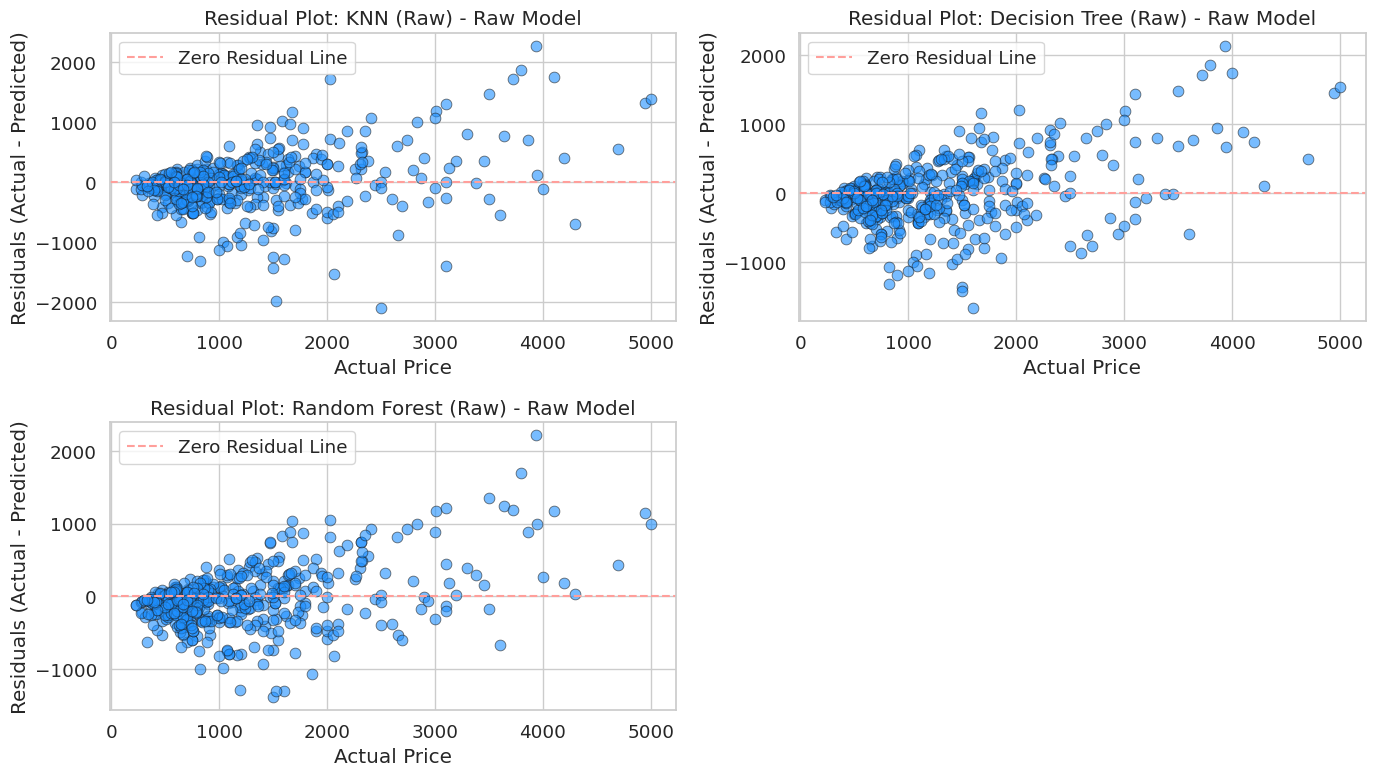


Generating Residual plots (Log Transformed Target)...


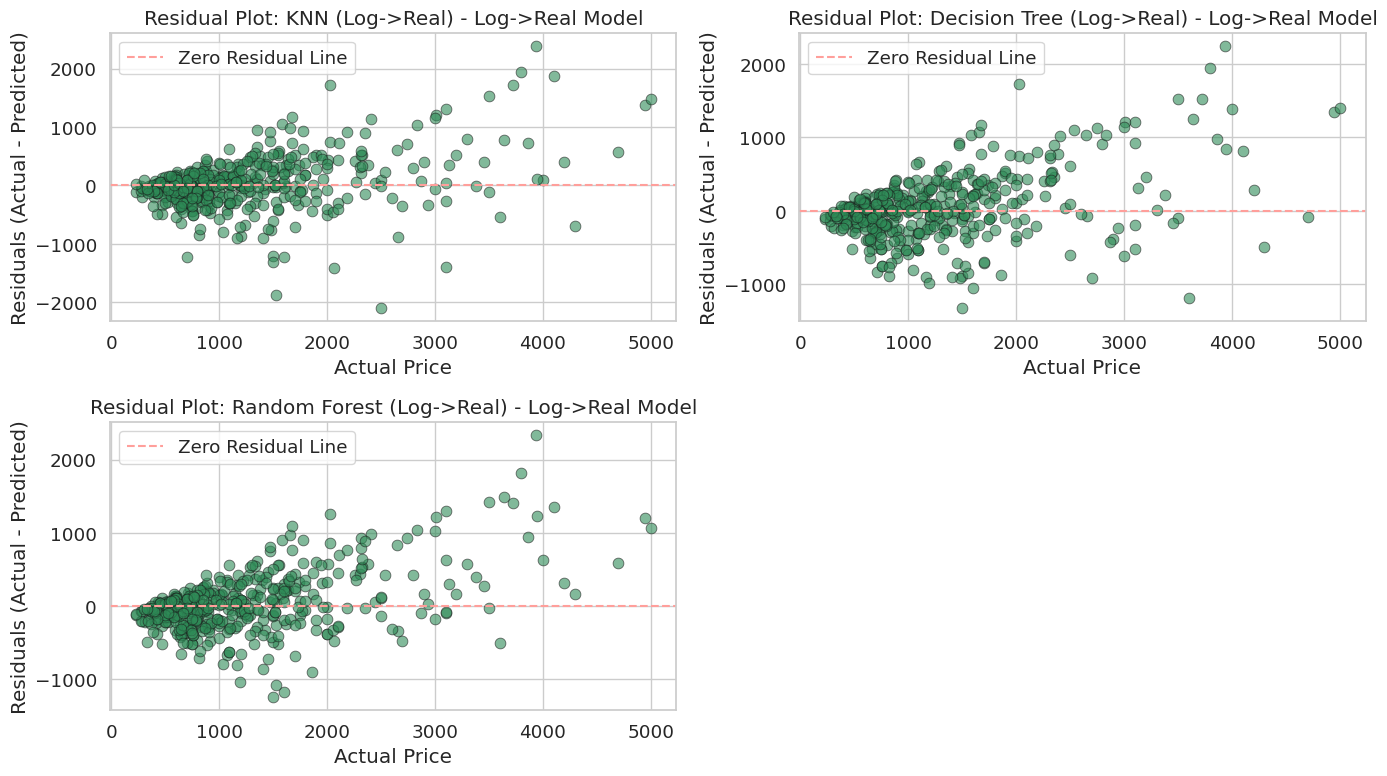

In [77]:

# Ensure the necessary data splits and trained models are available
X_val_tree_svr = globals().get('X_val_tree_svr', None)
y_val_raw_tree_svr = globals().get('y_val_raw_tree_svr', None)
raw_tuned_models = globals().get('raw_tuned_models', None)
log_tuned_models = globals().get('log_tuned_models', None)

if X_val_tree_svr is None or y_val_raw_tree_svr is None or raw_tuned_models is None or log_tuned_models is None:
    print("Required data splits or tuned models not found. Please ensure previous cells were run.")
else:
    # Define the models to plot
    models_to_plot = ['KNN', 'Decision Tree', 'Random Forest']

    # Calculate residuals for raw and log-transformed predictions
    raw_residuals_subset = {}
    log_real_residuals_subset = {}

    for name in models_to_plot:
        if name in raw_tuned_models and name in log_tuned_models:
            # Get raw predictions and calculate residuals
            raw_preds = raw_tuned_models[name].predict(X_val_tree_svr)
            raw_residuals_subset[f'{name} (Raw)'] = y_val_raw_tree_svr - raw_preds

            # Get log-transformed predictions, convert back, and calculate residuals
            log_preds = log_tuned_models[name].predict(X_val_tree_svr)
            log_real_preds = np.expm1(log_preds)
            log_real_residuals_subset[f'{name} (Log->Real)'] = y_val_raw_tree_svr - log_real_preds
        else:
             print(f"Tuned models for '{name}' not found in both raw_tuned_models and log_tuned_models.")


    def residual_plot_subset(actual_values, residuals_dict, title_suffix, color='indianred'):
        n = len(residuals_dict)
        if n == 0:
            print("No residuals to plot.")
            return

        ncols = 2
        nrows = (n + ncols - 1) // ncols

        fig, axes = plt.subplots(nrows, ncols, figsize=(14, 4 * nrows))

        if nrows == 1 and ncols > 1:
            axes = axes.reshape(1, ncols)
        elif nrows > 1 and ncols == 1:
            axes = axes.reshape(nrows, 1)
        elif nrows == 1 and ncols == 1:
            axes = np.array([axes])


        for i, (model, residuals) in enumerate(residuals_dict.items()):
            row = i // ncols
            col = i % ncols
            ax = axes[row, col]

            sns.scatterplot(x=actual_values, y=residuals, ax=ax, alpha=0.6,
                            edgecolor='k', s=60, color=color)
            ax.axhline(y=0, color='r', linestyle='--', label='Zero Residual Line') # Add a horizontal line at y=0
            ax.set_title(f'Residual Plot: {model} - {title_suffix}')
            ax.set_xlabel('Actual Price')
            ax.set_ylabel('Residuals (Actual - Predicted)')
            ax.legend()
            ax.grid(True)

        for i in range(n, nrows * ncols):
            row = i // ncols
            col = i % ncols
            if row < nrows and col < ncols:
                fig.delaxes(axes[row, col])

        plt.tight_layout()
        plt.show()

    # 🔷 Plot Raw model residuals
    print("Generating Residual plots (Raw Target)...")
    residual_plot_subset(y_val_raw_tree_svr, raw_residuals_subset, 'Raw Model', color='dodgerblue')

    # 🔶 Plot Log-transformed model residuals (converted back)
    print("\nGenerating Residual plots (Log Transformed Target)...")
    residual_plot_subset(y_val_raw_tree_svr, log_real_residuals_subset, 'Log->Real Model', color='seagreen')

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Combine Train + Validation sets

X_train_final = pd.concat([X_train_tree_svr, X_val_tree_svr], axis=0)
y_train_raw_final = pd.concat([y_train_raw_tree_svr, y_val_raw_tree_svr], axis=0)
y_train_log_final = pd.concat([y_train_log_tree_svr, y_val_log_tree_svr], axis=0)
y_test_true = y_test_raw_tree_svr  # Ground truth

-
# 2. Define Hyperparameter Grid

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

-
# 3. RAW TARGET Model

print("🔍 Tuning Random Forest on RAW prices...\n")
rf_raw = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_raw.fit(X_train_final, y_train_raw_final)
print("✅ Best Params (Raw):", rf_raw.best_params_)

# Predict and evaluate
y_pred_raw = rf_raw.predict(X_test_tree_svr)


# 4. LOG TARGET Model

print("\n🔍 Tuning Random Forest on LOG prices...\n")
rf_log = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_log.fit(X_train_final, y_train_log_final)
print("✅ Best Params (Log):", rf_log.best_params_)

# Predict, then revert log transformation
y_pred_log = np.exp(rf_log.predict(X_test_tree_svr))  # Assumes natural log was used

# 5. Evaluation Function

def evaluate(y_true, y_pred):
    return {
        'R²': r2_score(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred)
    }


# 6. Show Results

print("\n📊 Final Model Evaluation:")

print("\n🔹 RAW Model Performance:")
for k, v in evaluate(y_test_true, y_pred_raw).items():
    print(f"{k}: {v:.4f}")

print("\n🔹 LOG Model Performance (converted to real scale):")
for k, v in evaluate(y_test_true, y_pred_log).items():
    print(f"{k}: {v:.4f}")


🔍 Tuning Random Forest on RAW prices...

✅ Best Params (Raw): {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}

🔍 Tuning Random Forest on LOG prices...

✅ Best Params (Log): {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}

📊 Final Model Evaluation:

🔹 RAW Model Performance:
R²: 0.7244
RMSE: 462.6399
MAE: 304.1584
MAPE: 0.2476

🔹 LOG Model Performance (converted to real scale):
R²: 0.7290
RMSE: 458.7757
MAE: 300.7221
MAPE: 0.2330


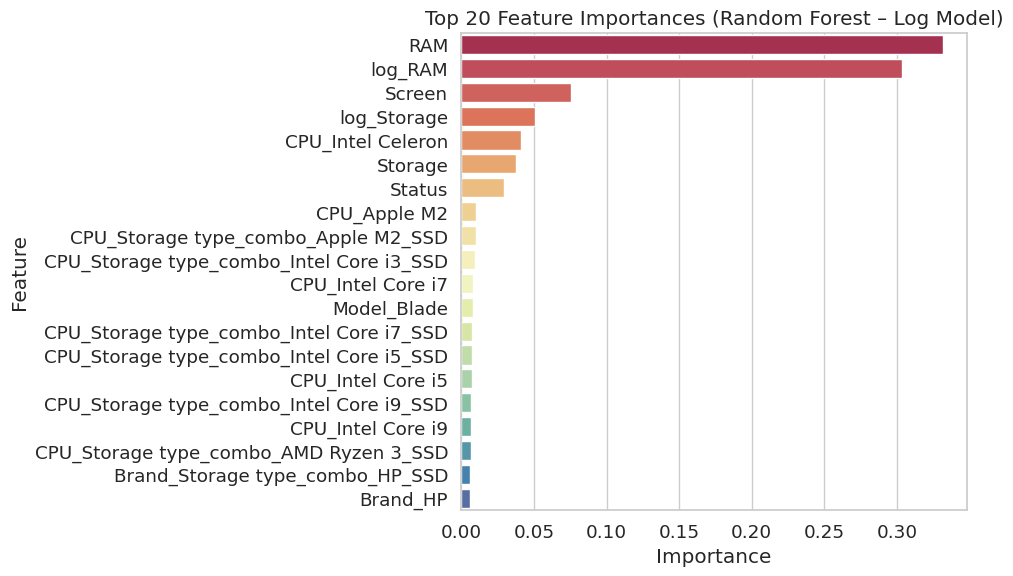

In [88]:
# Extract final model from GridSearchCV
best_rf_log = rf_log.best_estimator_

# Feature importances
importances = best_rf_log.feature_importances_
feature_names = X_train_final.columns  # Ensure this matches log model input

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20), palette='Spectral')
plt.title("Top 20 Feature Importances (Random Forest – Log Model)")
plt.tight_layout()
plt.show()


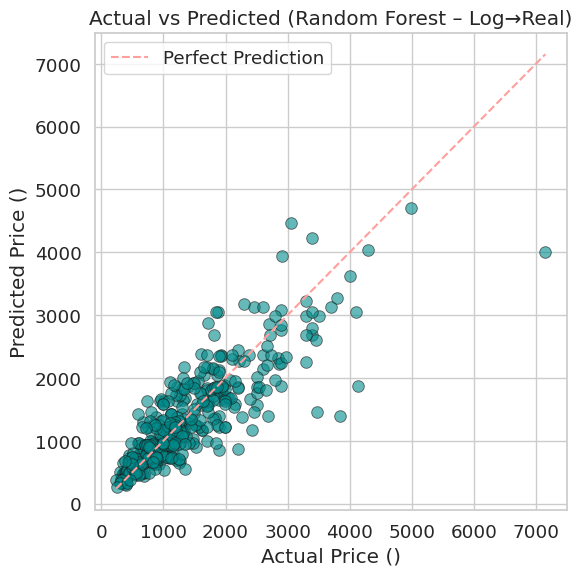

In [90]:

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_true, y=y_pred_log, alpha=0.6, edgecolor='k', s=70, color='darkcyan')
plt.plot([y_test_true.min(), y_test_true.max()],
         [y_test_true.min(), y_test_true.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Price ()')
plt.ylabel('Predicted Price ()')
plt.title('Actual vs Predicted (Random Forest – Log→Real)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


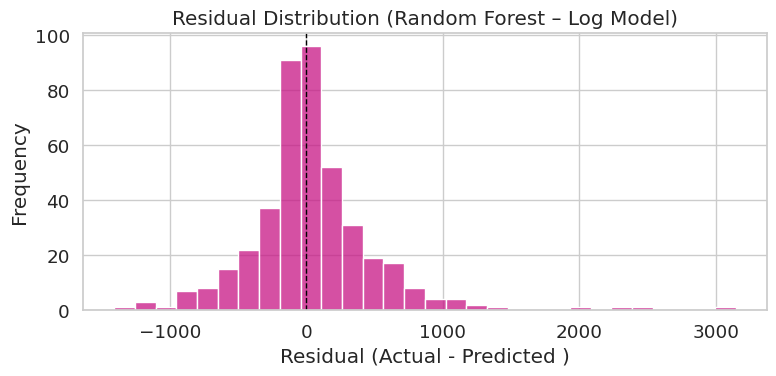

In [93]:
# Calculate residuals
residuals = y_test_true - y_pred_log

# Plot
plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=30, kde=False, color='mediumvioletred')
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.title("Residual Distribution (Random Forest – Log Model)")
plt.xlabel("Residual (Actual - Predicted )")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


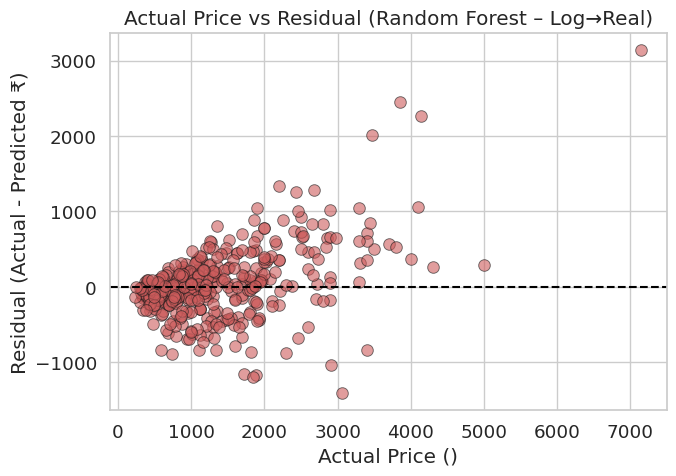

In [95]:
# Residuals
residuals = y_test_true - y_pred_log  # Already in ₹ because y_pred_log = np.exp(...)

# Scatter plot: Actual Price vs Residuals
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test_true, y=residuals, color='indianred', edgecolor='k', s=70, alpha=0.6)
plt.axhline(0, linestyle='--', color='black')
plt.title("Actual Price vs Residual (Random Forest – Log→Real)")
plt.xlabel("Actual Price ()")
plt.ylabel("Residual (Actual - Predicted ₹)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#FULL PIPELINE OF LAPTOP PRICE PREDICTION UISNG ML



#This project reflects my ability to drive data-driven insights end-to-end — from feature engineering and model tuning to rigorous evaluation and interpretability — and demonstrates my readiness to contribute meaningfully to real-world machine learning workflows in an industry setting